## Inicio

Una vez generado el dataframe inicial en el script anterior, este script se encargará de:

1) Limpieza del DF (eliminar nulos, duplicados, etc).


2) Cruzar información con la API de Coingecko.

3) Depurar el DF una vez generado dicho cruce.

4) Realizar un análisis de estadística descriptiva de las variables obtenidas.

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import time

In [ ]:
url ="https://raw.githubusercontent.com/rmarquez93/data_masterbdds2022/main/icos_scrapped.csv"
df = pd.read_csv(url, sep = ";", quotechar='"')
df.head(15)

,Index,ICO_Name,URL,ICO_price,ico_launch_month,ico_end_month,accepted_currency,ticker,platform,category,country
0,0,World Cup Apes,https://icoholder.com/en/world-cup-apes-1024462,NaN,NaN,NaN,NaN,WCA,NaN,Platform,NaN
1,1,Premium Trade,https://icoholder.com/en/premium-trade,NaN,"Jan 10, 2018",NaN,NaN,NaN,NaN,"Platform, Other",NaN
2,2,Moneypot X (MPX) ICO,https://icoholder.com/en/moneypot-x-mpx-ico-3246,NaN,"Sep 13, 2017",NaN,NaN,NaN,NaN,Entertainment,NaN
3,3,LoopX,https://icoholder.com/en/loopx-17448,NaN,"Jan 10, 2018",NaN,"ETH, BTC",LPX,NaN,"Platform, Cryptocurrency",Germany
4,4,Cromacoin,https://icoholder.com/en/cromacoin-25611,NaN,"Aug 21, 2018",NaN,"ETH, BTC, LTC",CRC,NaN,Platform,United Kingdom
5,5,CryptoKami,https://icoholder.com/en/cryptokami-18029,NaN,"Mar 20, 2018",NaN,NaN,KAMI,NaN,Cryptocurrency,NaN
6,6,Maximine ICO,https://icoholder.com/en/maximine-ico-21047,NaN,"Apr 25, 2018",NaN,NaN,NaN,NaN,"Platform, Cryptocurrency",Singapore
7,7,Cruisebit,https://icoholder.com/en/cruisebit-21907,0.04 USD,"May, 2018",NaN,"ETH, BTC",CRBT,NaN,Platform,United Kingdom
8,8,IDAC,https://icoholder.com/en/idac-26986,0.005 ETH,"Nov 1, 2018",NaN,ETH,IDAC,NaN,Platform,Singapore
9,9,TrueGOLD,https://icoholder.com/en/truegold-27002,0.22 USD,"Nov 1, 2018","Nov 30, 2018",NaN,TXAU,NaN,Platform,Singapore


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7769 entries, 0 to 7768
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Index              7769 non-null   int64 
 1   ICO_Name           7769 non-null   object
 2   URL                7769 non-null   object
 3   ICO_price          3554 non-null   object
 4   ico_launch_month   7751 non-null   object
 5   ico_end_month      847 non-null    object
 6   accepted_currency  2489 non-null   object
 7   ticker             5542 non-null   object
 8   platform           6 non-null      object
 9   category           6718 non-null   object
 10  country            3265 non-null   object
dtypes: int64(1), object(10)
memory usage: 728.3+ KB


## Limpieza por faltantes

Comenzamos con la limpieza inicial del dataframe seleccionando solamente aquellas ICOs de las cuales pudimos obtener la fecha de lanzamiento y el precio inicial de la misma ya que entendemos que esta es la información básica que debemos tener de las criptomonedas a analizar.

In [ ]:
df = df[df['ico_launch_month'].notna()]
df = df[df['ICO_price'].notna()]

## Conversión de tipos de datos

En este paso convertimos las fechas de formato texto a datetime para por último darles el format "día-mes-año".

Posteriormente eliminamos la columna "Index" ya que la misma no es necesaria.

In [ ]:
df["ico_launch_month"] = pd.to_datetime(df["ico_launch_month"], errors='coerce')
df["ico_end_month"] = pd.to_datetime(df["ico_end_month"], errors='coerce')
df["ico_launch_month"] = pd.to_datetime(df["ico_launch_month"],
                                        format = "%d%m%Y").dt.strftime("%d-%m-%Y")
df["ico_end_month"] = pd.to_datetime(df["ico_end_month"], 
                                     format = "%d%m%Y").dt.strftime("%d-%m-%Y")


df.rename(columns={'ICO_Name': 'ico_name', 'URL':'url', 'ICO_price': 'ico_price'},
          inplace=True)
df.head()

,Index,ico_name,url,ico_price,ico_launch_month,ico_end_month,accepted_currency,ticker,platform,category,country
7,7,Cruisebit,https://icoholder.com/en/cruisebit-21907,0.04 USD,01-05-2018,NaN,"ETH, BTC",CRBT,NaN,Platform,United Kingdom
8,8,IDAC,https://icoholder.com/en/idac-26986,0.005 ETH,01-11-2018,NaN,ETH,IDAC,NaN,Platform,Singapore
9,9,TrueGOLD,https://icoholder.com/en/truegold-27002,0.22 USD,01-11-2018,30-11-2018,NaN,TXAU,NaN,Platform,Singapore
14,14,Loanbyte,https://icoholder.com/en/loanbyte-26891,1 USD,26-02-2019,NaN,NaN,LBYT,NaN,Platform,NaN
16,16,IguVerseâ„¢,https://icoholder.com/en/iguverse-1025023,0.04 BUSD,25-06-2022,NaN,NaN,IGU,NaN,Platform,NaN


In [ ]:
df.drop("Index", axis =1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3553 entries, 7 to 7768
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ico_name           3553 non-null   object
 1   url                3553 non-null   object
 2   ico_price          3553 non-null   object
 3   ico_launch_month   3553 non-null   object
 4   ico_end_month      220 non-null    object
 5   accepted_currency  1409 non-null   object
 6   ticker             2995 non-null   object
 7   platform           1 non-null      object
 8   category           3114 non-null   object
 9   country            1770 non-null   object
dtypes: object(10)
memory usage: 305.3+ KB


Las variables Country, Category y name aparecen con espacios en blanco tanto al inicio como al final de cada texto. Para prevenir errores, aplicamos un strip que elimine dichos espacios en blanco. Posteriormente, filtramos el DF por solo aquellas que son de categoría "Platform".

In [ ]:
df.category = df.category.apply(lambda x: str(x).strip())
df.country = df.country.apply(lambda x: str(x).strip())

column_name = 'ico_name'

# Si queremos convertir los valores de Category a Platform para todos los
# que la contienen.
#df.category = df.category.apply(lambda x: 'Platform' if 
#str(x).contains('Platform') else x )

df[column_name] = df[column_name].apply(lambda x: str(x).strip())

In [ ]:
df.to_csv("icos_final.csv", sep=';', decimal='.',index=False)
# Me quedo solo con las que son de Platform
df = df[df['category'].str.contains("Platform")]

Una vez generado el subset, procedemos a cruzar lo extraído por webscrapping con la API disponible de Coingecko.

## CoinGecko

In [ ]:
!pip install pycoingecko
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()
listado = pd.DataFrame(cg.get_coins_list())
listado.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,id,symbol,name
0,01coin,zoc,01coin
1,0-5x-long-algorand-token,algohalf,0.5X Long Algorand
2,0-5x-long-altcoin-index-token,althalf,0.5X Long Altcoin Index
3,0-5x-long-ascendex-token-token,asdhalf,0.5X Long AscendEx
4,0-5x-long-bitcoin-cash-token,bchhalf,0.5X Long Bitcoin Cash


### Cruce con CoinGecko

Para hacer el cruce con Coingecko, comenzamos extrayendo el listado total de las criptomonedas listadas en Coingecko. 

Una vez generado ese listado, filtramos el dataframe por aquellas criptomonedas (resultado del webscrapping) donde su nombre coincide con el listado extraído de la API anteriormente mencionada.

Cabe destacar que se intentó inicialmente hacer el cruce por ticker pero dicha información daba lugar a resultados equívocos. En el dataset inicial (webscraping) hay varios tickers duplicados que, incluso al cruzar con Coingecko, daban como resultado criptomonedas con distinto nombre a lo que teníamos originalmente.

Dado lo anterior, decidimos penalizar la cantidad de datos obtenidos en pos de mejorar la calidad de dichos elementos.

In [ ]:
# Transformo la variable a lower
listado.name = listado.name.apply(lambda x: str.lower(str(x)))
df.ticker = df.ticker.apply(lambda x: str.lower(str(x)))
df.ico_name = df["ico_name"].apply(lambda x: str.lower(str(x)))
df = df.merge(listado, how='inner', left_on="ico_name", right_on='name', 
              right_index=False )
df.head(10)

,ico_name,url,ico_price,ico_launch_month,ico_end_month,accepted_currency,ticker,platform,category,country,id,symbol,name
0,cryptostone,https://icoholder.com/en/cryptostone-1025141,0.002 USDT,13-06-2022,NaN,NaN,cps,NaN,Platform,nan,cryptostone,cps,cryptostone
1,sf capital,https://icoholder.com/en/sf-capital-22994,1 USD,01-06-2018,NaN,NaN,sfcp,NaN,Platform,nan,sf-capital,sfcp,sf capital
2,xave coin,https://icoholder.com/en/xave-coin-1005792,5 USD,11-01-2022,NaN,NaN,xvc,NaN,Platform,nan,xave-coin,xvc,xave coin
3,worldcore,https://icoholder.com/en/worldcore,0.1 USD,14-10-2017,NaN,"ETH, BTC, FIAT",nan,NaN,"Platform, Cryptocurrency, Business services",Czech Republic,worldcore,wrc,worldcore
4,micromoney,https://icoholder.com/en/micromoney-3520,1 USD,18-10-2017,NaN,ETH,amm,NaN,Platform,Cambodia,micromoney,amm,micromoney
5,hara,https://icoholder.com/en/hara-23758,0.0059 USD,14-11-2018,NaN,"ETH, BTC, TEN",hart,NaN,"Platform, Big Data",Singapore,hara-token,hart,hara
6,cointorox,https://icoholder.com/en/cointorox-27152,1 ETH,15-11-2018,NaN,NaN,rox,NaN,Platform,Estonia,cointorox,orox,cointorox
7,tryvium,https://icoholder.com/en/tryvium-28054,0.04 USD,03-03-2019,NaN,NaN,nan,NaN,Platform,nan,tryvium-2,tryv,tryvium
8,fleta,https://icoholder.com/en/fleta-24468,0.05 USD,03-05-2019,NaN,NaN,fleta,NaN,Platform,nan,fleta,fleta,fleta
9,vegawallet,https://icoholder.com/en/vegawallet-25228,1 ETH,17-09-2018,NaN,NaN,vgw,NaN,Platform,nan,vegawallet-token,vgw,vegawallet


In [ ]:
import datetime as dt
col_ico_price = 'ico_price'
df.ico_launch_month = pd.to_datetime(df.ico_launch_month)
#Divido la columna ICO price por currency y monto
df[["ico_price","ico_price_currency"]] = df[col_ico_price].str.split(" ",1, 
                                                                expand= True)
df["ico_price"] = df[col_ico_price].str.replace(",",".").astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ico_name            230 non-null    object        
 1   url                 230 non-null    object        
 2   ico_price           230 non-null    float64       
 3   ico_launch_month    230 non-null    datetime64[ns]
 4   ico_end_month       4 non-null      object        
 5   accepted_currency   83 non-null     object        
 6   ticker              230 non-null    object        
 7   platform            0 non-null      object        
 8   category            230 non-null    object        
 9   country             230 non-null    object        
 10  id                  230 non-null    object        
 11  symbol              230 non-null    object        
 12  name                230 non-null    object        
 13  ico_price_currency  230 non-null    object        

## Funciones

Para generar las consultas de data histórica, generamos 3 funciones:

1) Get social data = Busca la información de reddit, twitter y telegram para la criptomoneda. Dicha información se extrae de la consulta generada a la API para X momento dado en el tiempo.

2) Get market data = Busca la información relevante a market data, si la consulta generada a la API es referida a datos historicos extrae solo el precio en usd, de lo contrario, ademas del precio extrae otras variables más como max_supply, total_supply, entre otras.

3) Get market cap = Si la consulta generada a la API es referida a datos históricos extrae el market cap en usd, y si no lo es, además del marketcap también obtiene el ranking y la variación en las ultimas 24hs.

In [ ]:
def get_socialData(df_ico, ico, hist=False):
    # redes sociales
    df_ico['reddit_accounts_active_48h'] = ico['community_data']['reddit_accounts_active_48h']
    df_ico['reddit_average_comments_48h'] = ico['community_data']['reddit_average_comments_48h']
    df_ico['reddit_subscribers'] = ico['community_data']['reddit_subscribers']
    df_ico['twitter_followers'] = ico['community_data']['twitter_followers']

    if not(hist): 
      df_ico['telegram_channel_user_count'] = ico['community_data']['telegram_channel_user_count']

    return df_ico

def get_market_data(df_ico, ico, hist=False):
    
    if not(hist):
        df_ico['max_supply'] = ico['market_data']['max_supply']
        df_ico['circulating_supply'] = ico['market_data']['circulating_supply']
        df_ico['total_supply'] = ico['market_data']['total_supply']
        
        try:
            if len(ico['market_data']['total_value_locked']) > 0: 
              df_ico['total_value_locked'] = ico['market_data']['total_value_locked']['usd']
            else: df_ico['total_value_locked'] = ico['market_data']['total_value_locked']
        except:
            df_ico['total_value_locked'] = None
        
        fully_diluted_valuation = ico['market_data']['fully_diluted_valuation']
        if (len(fully_diluted_valuation) >0) & (fully_diluted_valuation != None):
            df_ico['fully_diluted_valuation_usd'] = ico['market_data']['fully_diluted_valuation']['usd']
    
    if len(ico['market_data']['current_price']) >0:
        df_ico['current_price_usd'] = ico['market_data']['current_price']['usd']
    

    return df_ico

def get_market_cap(df_ico, ico, hist=False):
    
    if not(hist):
        market_data = ico['market_data']['market_cap_change_24h_in_currency']
        if (len(market_data) >0) & (market_data != None):
            df_ico['market_cap_change_24h_in_currency_usd'] = ico['market_data']['market_cap_change_24h_in_currency']['usd']
        
        if ico['market_data']['market_cap_rank'] != None: 
            df_ico['market_cap_rank'] = ico['market_data']['market_cap_rank']

    if len(ico['market_data']['market_cap']) > 0:
        df_ico['market_cap_usd'] = ico['market_data']['market_cap']['usd']

    return df_ico


def get_info_by_date(date, ico):
  df_ico = []
  df_ico.append(ico['market_data']['circulating_supply'])
  


In [ ]:
df.head()

,ico_name,url,ico_price,ico_launch_month,ico_end_month,accepted_currency,ticker,platform,category,country,id,symbol,name,ico_price_currency
0,cryptostone,https://icoholder.com/en/cryptostone-1025141,0.002,2022-06-13,NaN,NaN,cps,NaN,Platform,nan,cryptostone,cps,cryptostone,USDT
1,sf capital,https://icoholder.com/en/sf-capital-22994,1.000,2018-01-06,NaN,NaN,sfcp,NaN,Platform,nan,sf-capital,sfcp,sf capital,USD
2,xave coin,https://icoholder.com/en/xave-coin-1005792,5.000,2022-11-01,NaN,NaN,xvc,NaN,Platform,nan,xave-coin,xvc,xave coin,USD
3,worldcore,https://icoholder.com/en/worldcore,0.100,2017-10-14,NaN,"ETH, BTC, FIAT",nan,NaN,"Platform, Cryptocurrency, Business services",Czech Republic,worldcore,wrc,worldcore,USD
4,micromoney,https://icoholder.com/en/micromoney-3520,1.000,2017-10-18,NaN,ETH,amm,NaN,Platform,Cambodia,micromoney,amm,micromoney,USD


## Obtención variables

Antes de obtener las variables, generamos una iteración para convertir todas las monedas de cotización de ICOs que son distintas a USD a dólares americanos.

Esto es con el fin de homogeneizar los precios y poder utilizarlos homogeneamente.

In [ ]:

#Genero iteración por cada fila donde la moneda en la cual esta el precio de lanzamiento es distinta a USD
for index,row in df[(df["ico_price_currency"] != "USD") & (df["ico_price_currency"] != None)].iterrows():

  time.sleep(1.5)
  print("MONEDA: {}".format(row["ico_price_currency"]))
  print(row["ico_launch_month"])
  print(row["ico_name"])

  #Cruzo el símbolo de la moneda con el listado de coingecko para obtener la 
  #id de la criptomoneda en la cual se cotiza la ICO
  curr = listado[listado['symbol'].str.strip() == row["ico_price_currency"].lower()].head(1)

  #Si en la API se encuentra información sobre dicha criptomoneda, se comienza búsqueda
  if len(curr) != 0:

    #En id se recortan espacios para poder hacer la llamada a la API
    curr_id = curr.id.str.strip()
    
    #Obtenemos información histórica de la moneda para el día de lanzamiento de la ICO
    price = cg.get_coin_history_by_id(id=curr_id.values[0],  localization="false", date=row["ico_launch_month"].strftime("%d-%m-%Y"))
    try:
     #Se filtra la respuesta de la API solamente por el current price en USD al momento de la ICO
     price = price["market_data"]["current_price"]["usd"]
     print(price)

     #El precio actualizado de la ICO será entonces la multiplicación de la 
     #cotización de la moneda en la cual está listada (ej.: una moneda que cotiza
     # en ETH) por el valor original del precio de la ICO en dicha
     #moneda (en el caso de ejemplol, sería ETH). Ejemplo: Cripto1234 cotiza su 
     #ICO a un precio de 2 ETH. Buscamos la cotización de ETH a dicho día y
     # multiplicamos 2 X cotización ETH para obtener el precio en USD.
     print("PRECIO ACTUALIZADO : {}".format(price*df.iloc[index]["ico_price"]))
     df.iloc[index,2] = price*df.iloc[index]["ico_price"].copy()
     df.iloc[index,13] = None

     time.sleep(1)

    except:
      print("Not Found")
  print("-"*90,"\n")


MONEDA: USDT
2022-06-13 00:00:00
cryptostone
0.9981758319456596
PRECIO ACTUALIZADO : 0.0019963516638913195
------------------------------------------------------------------------------------------ 

MONEDA: ETH
2018-11-15 00:00:00
cointorox
184.02255937246562
PRECIO ACTUALIZADO : 184.02255937246562
------------------------------------------------------------------------------------------ 

MONEDA: ETH
2018-09-17 00:00:00
vegawallet
220.1415794346937
PRECIO ACTUALIZADO : 220.1415794346937
------------------------------------------------------------------------------------------ 

MONEDA: ETH
2018-06-30 00:00:00
just
432.50722049091496
PRECIO ACTUALIZADO : 1.4705245496691108
------------------------------------------------------------------------------------------ 

MONEDA: ETH
2019-07-29 00:00:00
nesten
211.229753661743
PRECIO ACTUALIZADO : 0.21122975366174299
------------------------------------------------------------------------------------------ 

MONEDA: ETH
2021-01-04 00:00:00
ar

En este punto generamos una búsqueda para todas las criptomonedas disponibles con la información actual, es decir, al día de ejecución del código. Este valor será el "valor presente" de las variables.

In [ ]:
df_full = pd.DataFrame()

for id in df.id.unique():

    time.sleep(1.5)
    df_oneIco = []
    #Obtengo datos en general de la ico.
    ico = cg.get_coin_by_id(id)

    df_oneIco = df[df.id == id].copy()
    df_oneIco['date_row'] = dt.datetime.today().strftime("%d-%m-%Y")
    
    #Market Data
    df_oneIco = get_market_data(df_oneIco, ico)

    # Market Cap
    df_oneIco = get_market_cap(df_oneIco, ico)

    # General
    df_oneIco['public_interest_score'] = ico['public_interest_score']
    df_oneIco['sentiment_votes_down_percentage'] = ico['sentiment_votes_down_percentage']
    df_oneIco['sentiment_votes_up_percentage'] = ico['sentiment_votes_up_percentage']
    
    df_oneIco = get_socialData(df_oneIco, ico)

    df_full = pd.concat([df_full, df_oneIco], axis = 0)

    time.sleep(1)

df_full.head()

,ico_name,url,ico_price,ico_launch_month,ico_end_month,accepted_currency,ticker,platform,category,country,...,market_cap_rank,market_cap_usd,public_interest_score,sentiment_votes_down_percentage,sentiment_votes_up_percentage,reddit_accounts_active_48h,reddit_average_comments_48h,reddit_subscribers,twitter_followers,telegram_channel_user_count
0,cryptostone,https://icoholder.com/en/cryptostone-1025141,0.001996,2022-06-13,NaN,NaN,cps,NaN,Platform,nan,...,764.0,16106059.00,0.002,0.0,100.0,0,0.0,0,35477,26162
1,sf capital,https://icoholder.com/en/sf-capital-22994,1.000000,2018-01-06,NaN,NaN,sfcp,NaN,Platform,nan,...,3674.0,13921.46,0.000,NaN,NaN,0,0.0,0,47,321
2,xave coin,https://icoholder.com/en/xave-coin-1005792,5.000000,2022-11-01,NaN,NaN,xvc,NaN,Platform,nan,...,NaN,0.00,0.001,NaN,NaN,0,0.0,0,36787,9549
3,worldcore,https://icoholder.com/en/worldcore,0.100000,2017-10-14,NaN,"ETH, BTC, FIAT",nan,NaN,"Platform, Cryptocurrency, Business services",Czech Republic,...,3752.0,6495.82,0.000,NaN,NaN,0,0.0,0,5494,726
4,micromoney,https://icoholder.com/en/micromoney-3520,1.000000,2017-10-18,NaN,ETH,amm,NaN,Platform,Cambodia,...,3306.0,78332.00,0.000,NaN,NaN,0,0.0,0,0,1050


## Datos Historicos a 3 meses

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

df_full["price_month_3"] = np.nan
# df_full['market_cap_rank_m3'] = np.nan
# df_full['total_value_locked_m3']=np.nan
# df_full['max_supply_m3']=np.nan
# df_full['circulating_supply_m3']=np.nan

for idx in df_full.index:
  time.sleep(1.2)
  
  id = df_full.loc[idx,'id']

  date_lookfor = df_full[df_full.id == id].ico_launch_month + pd.DateOffset(months=3)
  date_lookfor = pd.to_datetime(date_lookfor).dt.date.values[0].strftime("%d-%m-%Y")

  ico_hist = cg.get_coin_history_by_id(id=id,  localization="false", date=date_lookfor)
  
  if (len(ico_hist) >4) :
  
    if len(ico['market_data']['current_price']) >0:
      df_full.loc[idx, 'price_month_3'] = ico_hist['market_data']['current_price']['usd']

  time.sleep(1.5)

# Calculo el procentaje de variacion en el precio de la ico
df_full['porc_variance_m3'] = 100*((df_full['price_month_3'] - df_full[col_ico_price]) / df_full[col_ico_price])

df_full.head(10)

,ico_name,url,ico_price,ico_launch_month,ico_end_month,accepted_currency,ticker,platform,category,country,...,public_interest_score,sentiment_votes_down_percentage,sentiment_votes_up_percentage,reddit_accounts_active_48h,reddit_average_comments_48h,reddit_subscribers,twitter_followers,telegram_channel_user_count,price_month_3,porc_variance_m3
0,cryptostone,https://icoholder.com/en/cryptostone-1025141,0.001996,2022-06-13,NaN,NaN,cps,NaN,Platform,nan,...,0.002,0.0,100.0,0,0.0,0,35477,26162,NaN,NaN
1,sf capital,https://icoholder.com/en/sf-capital-22994,1.000000,2018-01-06,NaN,NaN,sfcp,NaN,Platform,nan,...,0.000,NaN,NaN,0,0.0,0,47,321,NaN,NaN
2,xave coin,https://icoholder.com/en/xave-coin-1005792,5.000000,2022-11-01,NaN,NaN,xvc,NaN,Platform,nan,...,0.001,NaN,NaN,0,0.0,0,36787,9549,NaN,NaN
3,worldcore,https://icoholder.com/en/worldcore,0.100000,2017-10-14,NaN,"ETH, BTC, FIAT",nan,NaN,"Platform, Cryptocurrency, Business services",Czech Republic,...,0.000,NaN,NaN,0,0.0,0,5494,726,0.430432,330.432297
4,micromoney,https://icoholder.com/en/micromoney-3520,1.000000,2017-10-18,NaN,ETH,amm,NaN,Platform,Cambodia,...,0.000,NaN,NaN,0,0.0,0,0,1050,1.263217,26.321658
5,hara,https://icoholder.com/en/hara-23758,0.005900,2018-11-14,NaN,"ETH, BTC, TEN",hart,NaN,"Platform, Big Data",Singapore,...,0.000,NaN,NaN,0,0.0,0,3358,1496,NaN,NaN
6,cointorox,https://icoholder.com/en/cointorox-27152,184.022559,2018-11-15,NaN,NaN,rox,NaN,Platform,Estonia,...,0.000,NaN,NaN,0,0.0,0,0,20,0.048151,-99.973834
7,tryvium,https://icoholder.com/en/tryvium-28054,0.040000,2019-03-03,NaN,NaN,nan,NaN,Platform,nan,...,0.000,100.0,0.0,4,0.0,18,37421,10333,NaN,NaN
8,fleta,https://icoholder.com/en/fleta-24468,0.050000,2019-03-05,NaN,NaN,fleta,NaN,Platform,nan,...,0.000,NaN,NaN,0,0.0,0,0,8912,NaN,NaN
9,vegawallet,https://icoholder.com/en/vegawallet-25228,220.141579,2018-09-17,NaN,NaN,vgw,NaN,Platform,nan,...,0.000,NaN,NaN,0,0.0,0,1820,219,NaN,NaN


In [ ]:
df_full[df_full.price_month_3 >0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 3 to 229
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   ico_name                               70 non-null     object        
 1   url                                    70 non-null     object        
 2   ico_price                              70 non-null     float64       
 3   ico_launch_month                       70 non-null     datetime64[ns]
 4   ico_end_month                          1 non-null      object        
 5   accepted_currency                      26 non-null     object        
 6   ticker                                 70 non-null     object        
 7   platform                               0 non-null      object        
 8   category                               70 non-null     object        
 9   country                                70 non-null     object     

## Datos Historicos a 6 meses

In [ ]:

df_full["price_month_6"] = np.nan
# df_full['market_cap_rank_m6'] = np.nan
# df_full['total_value_locked_m6']=np.nan
# df_full['max_supply_m6']=np.nan
# df_full['circulating_supply_m6']=np.nan

for idx in df_full.index:
  
  time.sleep(1.3)
  
  id = df_full.loc[idx,'id']

  date_lookfor = df_full[df_full.id == id].ico_launch_month + pd.DateOffset(months=6)
  date_lookfor = pd.to_datetime(date_lookfor).dt.date.values[0].strftime("%d-%m-%Y")

  ico_hist = cg.get_coin_history_by_id(id=id,  localization="false", date=date_lookfor)
  
  if (len(ico_hist) >4) :
  
    if len(ico['market_data']['current_price']) >0:
      df_full.loc[idx, 'price_month_6'] = ico_hist['market_data']['current_price']['usd']

  time.sleep(1.5)

# Calculo el procentaje de variacion en el precio de la ico
df_full['porc_variance_m6'] = 100*((df_full['price_month_6'] - df_full[col_ico_price]) / df_full[col_ico_price])

df_full.head(10)

,ico_name,url,ico_price,ico_launch_month,ico_end_month,accepted_currency,ticker,platform,category,country,...,sentiment_votes_up_percentage,reddit_accounts_active_48h,reddit_average_comments_48h,reddit_subscribers,twitter_followers,telegram_channel_user_count,price_month_3,porc_variance_m3,price_month_6,porc_variance_m6
0,cryptostone,https://icoholder.com/en/cryptostone-1025141,0.001996,2022-06-13,NaN,NaN,cps,NaN,Platform,nan,...,100.0,0,0.0,0,35477,26162,NaN,NaN,NaN,NaN
1,sf capital,https://icoholder.com/en/sf-capital-22994,1.000000,2018-01-06,NaN,NaN,sfcp,NaN,Platform,nan,...,NaN,0,0.0,0,47,321,NaN,NaN,NaN,NaN
2,xave coin,https://icoholder.com/en/xave-coin-1005792,5.000000,2022-11-01,NaN,NaN,xvc,NaN,Platform,nan,...,NaN,0,0.0,0,36787,9549,NaN,NaN,NaN,NaN
3,worldcore,https://icoholder.com/en/worldcore,0.100000,2017-10-14,NaN,"ETH, BTC, FIAT",nan,NaN,"Platform, Cryptocurrency, Business services",Czech Republic,...,NaN,0,0.0,0,5494,726,0.430432,330.432297,0.038685,-61.315317
4,micromoney,https://icoholder.com/en/micromoney-3520,1.000000,2017-10-18,NaN,ETH,amm,NaN,Platform,Cambodia,...,NaN,0,0.0,0,0,1050,1.263217,26.321658,0.220621,-77.937942
5,hara,https://icoholder.com/en/hara-23758,0.005900,2018-11-14,NaN,"ETH, BTC, TEN",hart,NaN,"Platform, Big Data",Singapore,...,NaN,0,0.0,0,3358,1496,NaN,NaN,0.003002,-49.116726
6,cointorox,https://icoholder.com/en/cointorox-27152,184.022559,2018-11-15,NaN,NaN,rox,NaN,Platform,Estonia,...,NaN,0,0.0,0,0,20,0.048151,-99.973834,0.032318,-99.982438
7,tryvium,https://icoholder.com/en/tryvium-28054,0.040000,2019-03-03,NaN,NaN,nan,NaN,Platform,nan,...,0.0,4,0.0,18,37421,10333,NaN,NaN,NaN,NaN
8,fleta,https://icoholder.com/en/fleta-24468,0.050000,2019-03-05,NaN,NaN,fleta,NaN,Platform,nan,...,NaN,0,0.0,0,0,8912,NaN,NaN,0.011814,-76.372864
9,vegawallet,https://icoholder.com/en/vegawallet-25228,220.141579,2018-09-17,NaN,NaN,vgw,NaN,Platform,nan,...,NaN,0,0.0,0,1820,219,NaN,NaN,0.135883,-99.938275


In [ ]:
df_full.to_csv("ico_con_variables.csv", sep=';', decimal='.', index_label=False)

# Google Trends

In [ ]:
#Instalamos pytrends
!pip install pytrends
from pytrends.request import TrendReq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=8a0a837bae6b7bb73e63a107e5d918d6f3765127e30cf04b9ba62fb2c4fb84b3
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends


In [ ]:
# from pytrends.request import TrendReq

# url ="ICO_con_variables.csv" # Reemplazar por url con todas las ICOS

# df_full = pd.read_csv(url, sep = ";", quotechar='"')
# df.head(5)

In [ ]:
#Creamos dataset con las 3 columnas que vamos a trabajar
df_full['ico_launch_datetime'] = pd.to_datetime(df_full.ico_launch_month)

#Separamos la variable ico_launch_month en año, mes y dia.
df_full['year'] = df_full['ico_launch_datetime'].dt.year
df_full['month'] = df_full['ico_launch_datetime'].dt.month
df_full['day'] = df_full['ico_launch_datetime'].dt.day

df_full['year'] = df_full["year"].astype(int)
df_full['month'] = df_full["month"].astype(int)
df_full['day'] = df_full["day"].astype(int)

df_full.head()

,ico_name,url,ico_price,ico_launch_month,ico_end_month,accepted_currency,ticker,platform,category,country,...,twitter_followers,telegram_channel_user_count,price_month_3,porc_variance_m3,price_month_6,porc_variance_m6,ico_launch_datetime,year,month,day
0,cryptostone,https://icoholder.com/en/cryptostone-1025141,0.001996,2022-06-13,NaN,NaN,cps,NaN,Platform,nan,...,35477,26162,NaN,NaN,NaN,NaN,2022-06-13,2022,6,13
1,sf capital,https://icoholder.com/en/sf-capital-22994,1.000000,2018-01-06,NaN,NaN,sfcp,NaN,Platform,nan,...,47,321,NaN,NaN,NaN,NaN,2018-01-06,2018,1,6
2,xave coin,https://icoholder.com/en/xave-coin-1005792,5.000000,2022-11-01,NaN,NaN,xvc,NaN,Platform,nan,...,36787,9549,NaN,NaN,NaN,NaN,2022-11-01,2022,11,1
3,worldcore,https://icoholder.com/en/worldcore,0.100000,2017-10-14,NaN,"ETH, BTC, FIAT",nan,NaN,"Platform, Cryptocurrency, Business services",Czech Republic,...,5494,726,0.430432,330.432297,0.038685,-61.315317,2017-10-14,2017,10,14
4,micromoney,https://icoholder.com/en/micromoney-3520,1.000000,2017-10-18,NaN,ETH,amm,NaN,Platform,Cambodia,...,0,1050,1.263217,26.321658,0.220621,-77.937942,2017-10-18,2017,10,18


In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Data columns (total 40 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   ico_name                               230 non-null    object        
 1   url                                    230 non-null    object        
 2   ico_price                              230 non-null    float64       
 3   ico_launch_month                       230 non-null    datetime64[ns]
 4   ico_end_month                          4 non-null      object        
 5   accepted_currency                      83 non-null     object        
 6   ticker                                 230 non-null    object        
 7   platform                               0 non-null      object        
 8   category                               230 non-null    object        
 9   country                                230 non-null    object    

In [ ]:
pytrend = TrendReq()

for idx in df_full.index:  
  try:
    
    g_trends = pytrend.get_historical_interest([df_full.loc[idx, column_name]], 
                    year_start = df_full.loc[idx,"year"], month_start = df_full.loc[idx,"month"],
                    day_start = df_full.loc[idx,"day"], hour_start = 0,
                    year_end = df_full.loc[idx,"year"], month_end = df_full.loc[idx,"month"],
                    day_end = df_full.loc[idx,"day"], hour_end=23, 
                    cat=0, geo='', gprop='',
                    sleep=70)
    if g_trends.shape[0] > 0:
      df_full.loc[idx,"quantity_gt"] = g_trends.sum()[0]
    
    time.sleep(2)

  except Exception as e:
    print("------- ICO Not found: ", df_full.loc[idx, column_name])

df_full

The request failed: Google returned a response with code 400.
The request failed: Google returned a response with code 400.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The requ

,ico_name,url,ico_price,ico_launch_month,ico_end_month,accepted_currency,ticker,platform,category,country,...,telegram_channel_user_count,price_month_3,porc_variance_m3,price_month_6,porc_variance_m6,ico_launch_datetime,year,month,day,quantity_gt
0,cryptostone,https://icoholder.com/en/cryptostone-1025141,0.001996,2022-06-13,NaN,NaN,cps,NaN,Platform,nan,...,26162,NaN,NaN,NaN,NaN,2022-06-13,2022,6,13,189.0
1,sf capital,https://icoholder.com/en/sf-capital-22994,1.000000,2018-01-06,NaN,NaN,sfcp,NaN,Platform,nan,...,321,NaN,NaN,NaN,NaN,2018-01-06,2018,1,6,315.0
2,xave coin,https://icoholder.com/en/xave-coin-1005792,5.000000,2022-11-01,NaN,NaN,xvc,NaN,Platform,nan,...,9549,NaN,NaN,NaN,NaN,2022-11-01,2022,11,1,NaN
3,worldcore,https://icoholder.com/en/worldcore,0.100000,2017-10-14,NaN,"ETH, BTC, FIAT",nan,NaN,"Platform, Cryptocurrency, Business services",Czech Republic,...,726,0.430432,330.432297,0.038685,-61.315317,2017-10-14,2017,10,14,207.0
4,micromoney,https://icoholder.com/en/micromoney-3520,1.000000,2017-10-18,NaN,ETH,amm,NaN,Platform,Cambodia,...,1050,1.263217,26.321658,0.220621,-77.937942,2017-10-18,2017,10,18,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,avinoc,https://icoholder.com/en/avinoc-22592,0.000189,2018-07-14,NaN,ETH,avinoc,NaN,Platform,nan,...,6262,0.009304,4820.748244,0.005297,2701.805026,2018-07-14,2018,7,14,145.0
226,uhive,https://icoholder.com/en/uhive-20797,0.000189,2018-10-29,NaN,"ETH, BTC, FIAT",hve,NaN,"Platform, Virtual Reality, Entertainment",United Kingdom,...,11953,NaN,NaN,NaN,NaN,2018-10-29,2018,10,29,157.0
227,nexo,https://icoholder.com/en/nexo-18938,0.000189,2018-01-03,NaN,"ETH, BTC",nexo,NaN,Platform,Switzerland,...,38065,NaN,NaN,0.115969,61236.510405,2018-01-03,2018,1,3,770.0
228,satt,https://icoholder.com/en/satt-21400,0.000189,2018-01-05,NaN,NaN,satt,NaN,"Platform, Cryptocurrency",nan,...,2923,NaN,NaN,NaN,NaN,2018-01-05,2018,1,5,780.0


In [ ]:
df_full.to_csv("ico_gtrend.csv", sep=';', decimal='.', index_label=False)

Generamos la variable "target" que es de tipo dicotómica y será "True" cuando la variación sea positiva y "False" cuando no lo sea.

In [ ]:

df_full = pd.read_csv('https://raw.githubusercontent.com/josedagrava/TFM-DataScientMaster/main/ico_v3.csv?token=GHSAT0AAAAAABXWROZWEPUWXIUACHKSHEDWYX3XYSA', decimal='.', sep=';')

df_full['target'] = df_full.porc_variance_m6 > 0

df_full.target = df_full.target.apply(lambda x: int(x))
df_full

,ico_name,url,ico_price,ico_launch_month,ico_end_month,accepted_currency,ticker,platform,category,country,...,price_month_3,porc_variance_m3,price_month_6,porc_variance_m6,ico_launch_datetime,year,month,day,quantity_gt,target
0,cryptostone,https://icoholder.com/en/cryptostone-1025141,0.001996,2022-06-13,NaN,NaN,cps,NaN,Platform,NaN,...,NaN,NaN,NaN,NaN,2022-06-13,2022,6,13,164.0,0
1,sf capital,https://icoholder.com/en/sf-capital-22994,1.000000,2018-01-06,NaN,NaN,sfcp,NaN,Platform,NaN,...,NaN,NaN,NaN,NaN,2018-01-06,2018,1,6,292.0,0
2,xave coin,https://icoholder.com/en/xave-coin-1005792,5.000000,2022-11-01,NaN,NaN,xvc,NaN,Platform,NaN,...,NaN,NaN,NaN,NaN,2022-11-01,2022,11,1,NaN,0
3,worldcore,https://icoholder.com/en/worldcore,0.100000,2017-10-14,NaN,"ETH, BTC, FIAT",NaN,NaN,"Platform, Cryptocurrency, Business services",Czech Republic,...,0.430432,330.432297,0.038685,-61.315317,2017-10-14,2017,10,14,38.0,0
4,micromoney,https://icoholder.com/en/micromoney-3520,1.000000,2017-10-18,NaN,ETH,amm,NaN,Platform,Cambodia,...,1.263217,26.321658,0.220621,-77.937942,2017-10-18,2017,10,18,145.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,avinoc,https://icoholder.com/en/avinoc-22592,0.000189,2018-07-14,NaN,ETH,avinoc,NaN,Platform,NaN,...,0.009304,4820.748244,0.005297,2701.805026,2018-07-14,2018,7,14,145.0,1
226,uhive,https://icoholder.com/en/uhive-20797,0.000189,2018-10-29,NaN,"ETH, BTC, FIAT",hve,NaN,"Platform, Virtual Reality, Entertainment",United Kingdom,...,NaN,NaN,NaN,NaN,2018-10-29,2018,10,29,165.0,0
227,nexo,https://icoholder.com/en/nexo-18938,0.000189,2018-01-03,NaN,"ETH, BTC",nexo,NaN,Platform,Switzerland,...,NaN,NaN,0.115969,61236.510405,2018-01-03,2018,1,3,831.0,1
228,satt,https://icoholder.com/en/satt-21400,0.000189,2018-01-05,NaN,NaN,satt,NaN,"Platform, Cryptocurrency",NaN,...,NaN,NaN,NaN,NaN,2018-01-05,2018,1,5,828.0,0


# Análisis estadístico inicial

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Data columns (total 42 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ico_name                               230 non-null    object 
 1   url                                    230 non-null    object 
 2   ico_price                              230 non-null    float64
 3   ico_launch_month                       230 non-null    object 
 4   ico_end_month                          4 non-null      object 
 5   accepted_currency                      83 non-null     object 
 6   ticker                                 206 non-null    object 
 7   platform                               0 non-null      float64
 8   category                               230 non-null    object 
 9   country                                102 non-null    object 
 10  id                                     230 non-null    object 
 11  symbol

In [ ]:
print("Análisis de nulos por variable\n")

for i,x in df_full.iteritems():
  print("{} : {} \npercentage: {}% \n---------------------------------\n"
    .format(i, x.isna().sum(),round(x.isna().sum()/len(x)*100,2)))

Análisis de nulos por variable

ico_name : 0 
percentage: 0.0% 
---------------------------------

url : 0 
percentage: 0.0% 
---------------------------------

ico_price : 0 
percentage: 0.0% 
---------------------------------

ico_launch_month : 0 
percentage: 0.0% 
---------------------------------

ico_end_month : 226 
percentage: 98.26% 
---------------------------------

accepted_currency : 147 
percentage: 63.91% 
---------------------------------

ticker : 24 
percentage: 10.43% 
---------------------------------

platform : 230 
percentage: 100.0% 
---------------------------------

category : 0 
percentage: 0.0% 
---------------------------------

country : 128 
percentage: 55.65% 
---------------------------------

id : 0 
percentage: 0.0% 
---------------------------------

symbol : 0 
percentage: 0.0% 
---------------------------------

name : 0 
percentage: 0.0% 
---------------------------------

ico_price_currency : 31 
percentage: 13.48% 
------------------------------

A partir del análisis inicial, se puede observar que algunas variables tienen un porcentaje considerable de valores nulos. Posteriormente este tema será vuelto a analizar en el presente trabajo para lidiar con este tipo de situaciones y determinar el camino óptimo para cada variable (pudiendo ser el mismo utilizar un método de sustitución de nulos o eliminación completa de la variable dependiendo de cada caso).

In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Data columns (total 42 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ico_name                               230 non-null    object 
 1   url                                    230 non-null    object 
 2   ico_price                              230 non-null    float64
 3   ico_launch_month                       230 non-null    object 
 4   ico_end_month                          4 non-null      object 
 5   accepted_currency                      83 non-null     object 
 6   ticker                                 206 non-null    object 
 7   platform                               0 non-null      float64
 8   category                               230 non-null    object 
 9   country                                102 non-null    object 
 10  id                                     230 non-null    object 
 11  symbol

In [ ]:
#Genero una función que dividirá en buckets las variables continuas.
# Posteriormente hace un recuento de frecuencias absolutas y devuelve un histograma

def freq_table(columnName):
  #Regla Sturges para dividir en buckets los datos contínuos
  # print(1+3.22*np.log10(len(df_full)))
  freq = pd.qcut(df_full[columnName], round(1+3.22*np.log10(len(df_full))), duplicates = "drop")
  freq.sort_values(inplace=True)
  plt.figure(figsize=(20, 10))
  plt.hist([df_full[df_full["target"] == 1][columnName],
            df_full[df_full["target"] != 1][columnName]],
            round(1+3.22*np.log10(len(df_full))),alpha = 0.5, label = ["Positivos","Negativos"])
  plt.legend(loc= 'upper right')
  #histo  = freq.value_counts(sort = False).plot( kind = 'bar', ylabel = 'frequency')
  plt.xticks(rotation = 45)
  return print(freq.value_counts(sort= False)) 

count        230
unique       228
top       verify
freq           2
Name: ico_name, dtype: object 
--------------------------------

count                                              230
unique                                             230
top       https://icoholder.com/en/cryptostone-1025141
freq                                                 1
Name: url, dtype: object 
--------------------------------

Tabla de frecuencias de variable ico_price
(-0.00099999995, 0.000189]    100
(0.000189, 0.000346]            2
(0.000346, 0.02]               27
(0.02, 0.0977]                 24
(0.0977, 0.3]                  28
(0.3, 7.478]                   23
(7.478, 5679.216]              26
Name: ico_price, dtype: int64


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


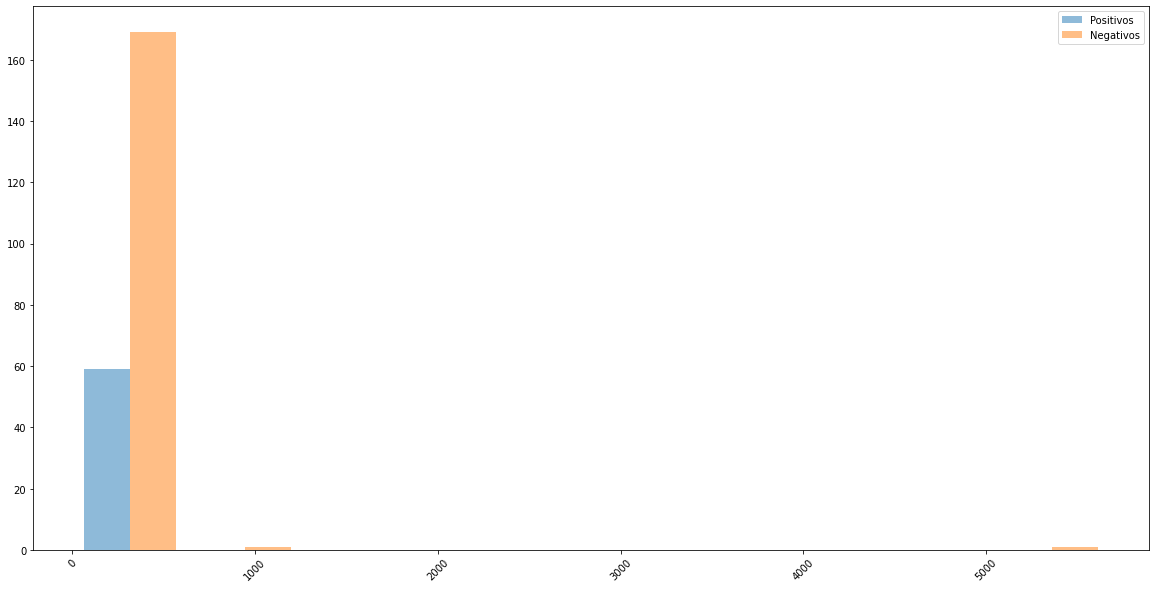

Asimetría: 14.070535379545372
Curtosis: 207.0743493820172
count    2.300000e+02
mean     4.800788e+01
std      3.827384e+02
min      5.000000e-11
25%      1.890700e-04
50%      8.350000e-03
75%      2.475000e-01
max      5.679216e+03
Name: ico_price, dtype: float64 
Coeficiente de variación de Spearman: 7.972408358717402 
--------------------------------

count            230
unique           180
top       2018-01-08
freq               6
Name: ico_launch_month, dtype: object 
--------------------------------

count              4
unique             4
top       10-07-2018
freq               1
Name: ico_end_month, dtype: object 
--------------------------------

count       83
unique      28
top       ETH 
freq        36
Name: accepted_currency, dtype: object 
--------------------------------

count      206
unique     203
top       lion
freq         2
Name: ticker, dtype: object 
--------------------------------

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      

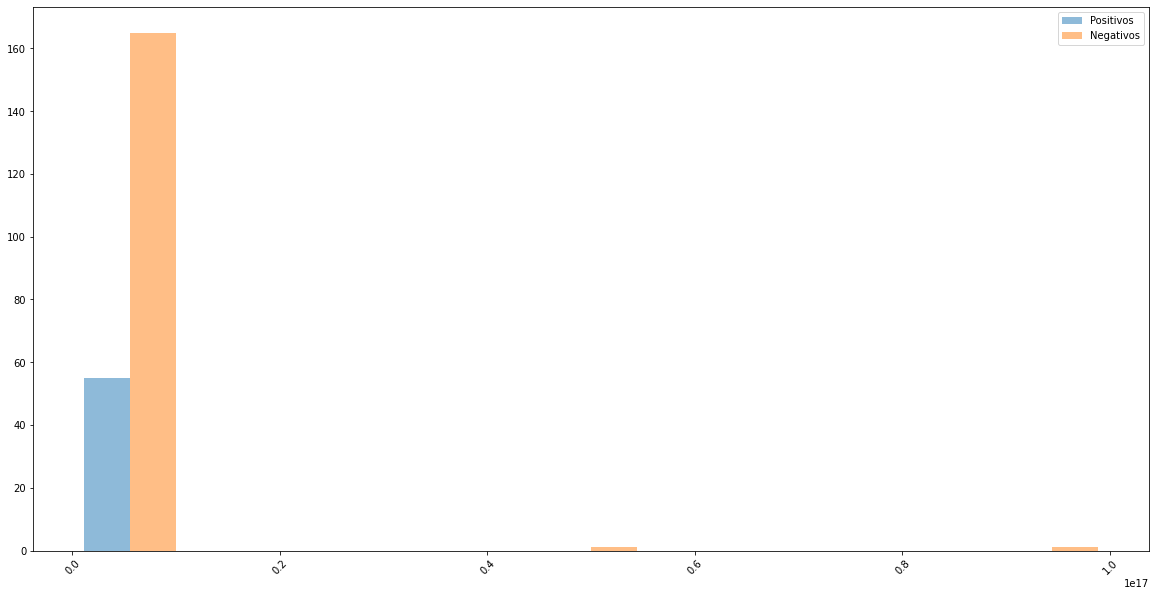

Asimetría: 11.948700092740454
Curtosis: 149.4440584028538
count    2.220000e+02
mean     6.824513e+14
std      7.489920e+15
min      1.000010e+05
25%      1.000000e+08
50%      3.450003e+08
75%      1.109770e+09
max      1.000000e+17
Name: total_supply, dtype: float64 
Coeficiente de variación de Spearman: 10.97502380076128 
--------------------------------

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: total_value_locked, dtype: float64 
--------------------------------

Tabla de frecuencias de variable fully_diluted_valuation_usd
(0.0252, 250321.0]             7
(250321.0, 679568.0]           6
(679568.0, 1778020.0]          6
(1778020.0, 3423880.0]         6
(3423880.0, 5994969.0]         6
(5994969.0, 15722177.0]        6
(15722177.0, 29696692.0]       5
(29696692.0, 413355907.0]      7
(413355907.0, 3391034598.0]    6
Name: fully_diluted_valuation_usd, dtype: int64


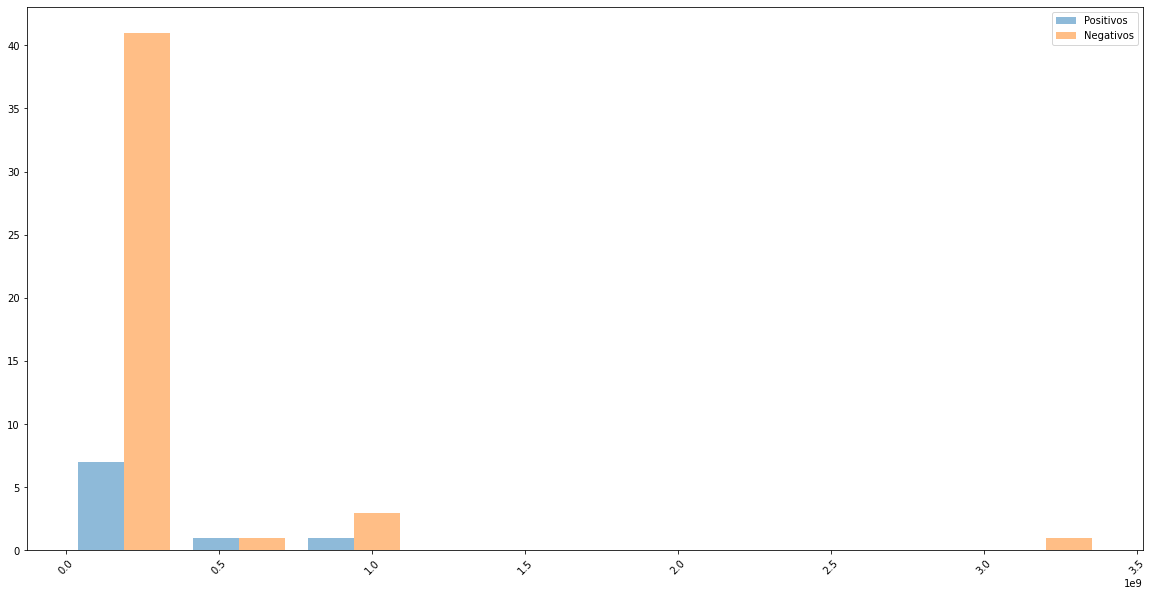

Asimetría: 5.332421489173696
Curtosis: 32.79310444535006
count    5.500000e+01
mean     1.559816e+08
std      5.021996e+08
min      2.624251e-02
25%      7.665530e+05
50%      4.253960e+06
75%      2.718607e+07
max      3.391035e+09
Name: fully_diluted_valuation_usd, dtype: float64 
Coeficiente de variación de Spearman: 3.2196083578926555 
--------------------------------

Tabla de frecuencias de variable current_price_usd
(-0.000999999999622, 0.000107]    26
(0.000107, 0.000362]              25
(0.000362, 0.000949]              25
(0.000949, 0.00241]               25
(0.00241, 0.00514]                26
(0.00514, 0.0148]                 25
(0.0148, 0.0421]                  25
(0.0421, 0.247]                   25
(0.247, 728.85]                   26
Name: current_price_usd, dtype: int64


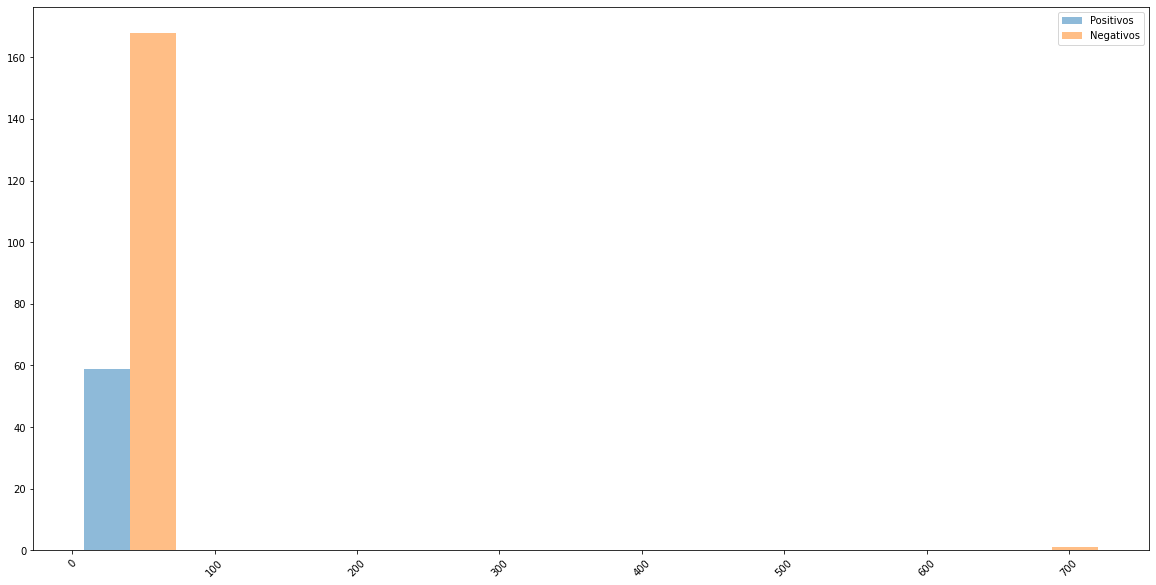

Asimetría: 15.064941501528379
Curtosis: 227.28841271731085
count    2.280000e+02
mean     3.534277e+00
std      4.828404e+01
min      3.776420e-13
25%      4.897250e-04
50%      3.787590e-03
75%      3.388117e-02
max      7.288500e+02
Name: current_price_usd, dtype: float64 
Coeficiente de variación de Spearman: 13.661644727293156 
--------------------------------

Tabla de frecuencias de variable market_cap_change_24h_in_currency_usd
(-15866135.076, -129786.367]    18
(-129786.367, -8958.055]        18
(-8958.055, 0.0]                90
(0.0, 12640.684]                15
(12640.684, 8536792.0]          18
Name: market_cap_change_24h_in_currency_usd, dtype: int64


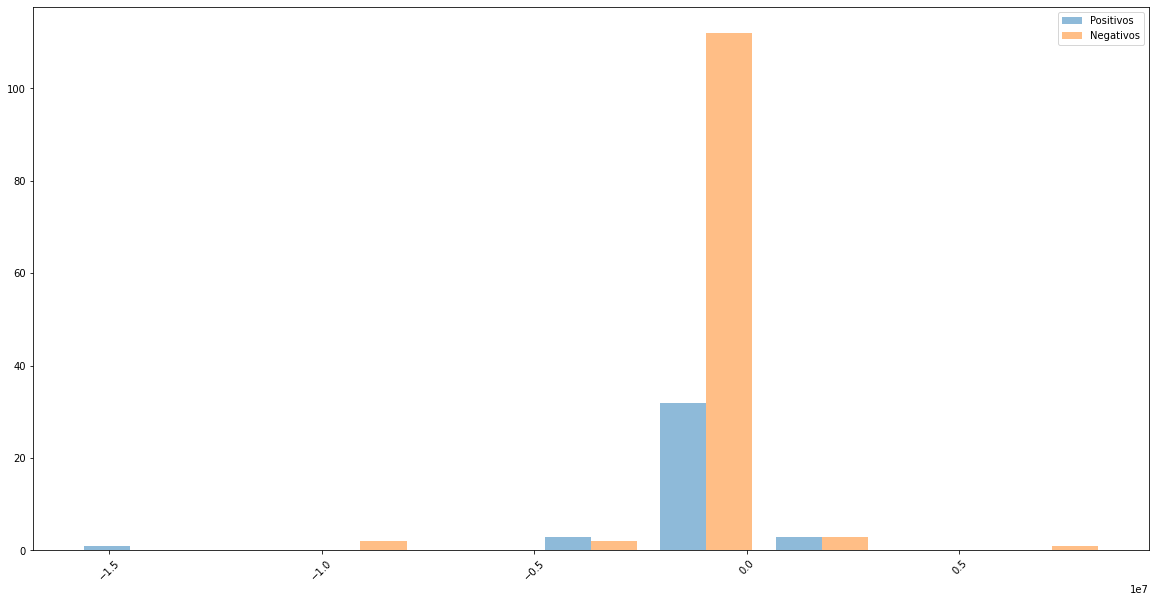

Asimetría: -4.620286070540247
Curtosis: 40.22864476268083
count    1.590000e+02
mean    -2.541816e+05
std      1.849931e+06
min     -1.586614e+07
25%     -3.406429e+03
50%      0.000000e+00
75%      0.000000e+00
max      8.536792e+06
Name: market_cap_change_24h_in_currency_usd, dtype: float64 
Coeficiente de variación de Spearman: -7.277989705699739 
--------------------------------

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: market_cap_rank, dtype: float64 
--------------------------------

Tabla de frecuencias de variable market_cap_usd
(-0.001, 32332.0]           126
(32332.0, 219646.0]          25
(219646.0, 778838.0]         24
(778838.0, 3564336.0]        26
(3564336.0, 539245087.0]     25
Name: market_cap_usd, dtype: int64


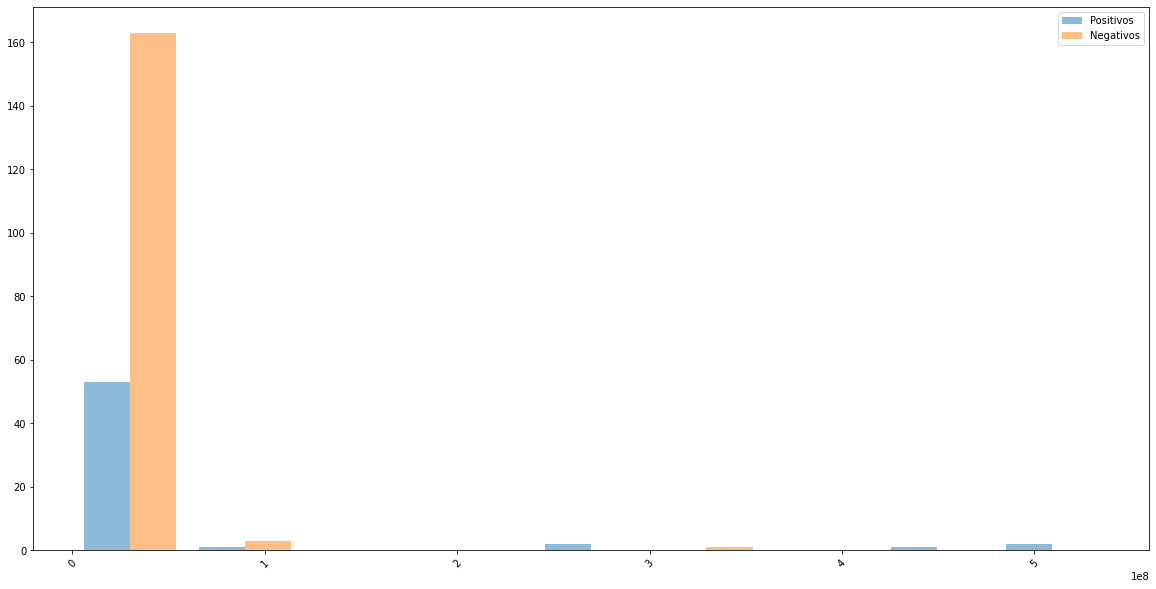

Asimetría: 6.302240243091098
Curtosis: 41.46602511253006
count    2.260000e+02
mean     1.350315e+07
std      6.673701e+07
min      0.000000e+00
25%      0.000000e+00
50%      5.227655e+03
75%      5.270552e+05
max      5.392451e+08
Name: market_cap_usd, dtype: float64 
Coeficiente de variación de Spearman: 4.942329812798437 
--------------------------------

Tabla de frecuencias de variable public_interest_score
(-0.001, 0.001]    190
(0.001, 0.003]      15
(0.003, 0.403]      25
Name: public_interest_score, dtype: int64


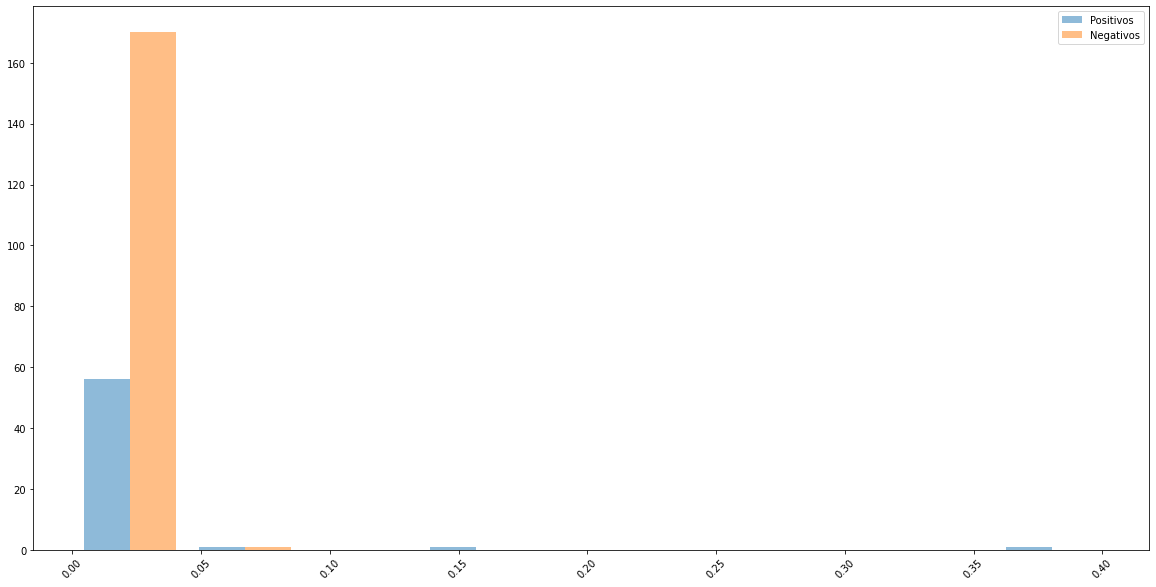

Asimetría: 12.131359346890694
Curtosis: 161.01022612819045
count    230.000000
mean       0.004065
std        0.028964
min        0.000000
25%        0.000000
50%        0.000000
75%        0.001000
max        0.403000
Name: public_interest_score, dtype: float64 
Coeficiente de variación de Spearman: 7.124924659946503 
--------------------------------

Tabla de frecuencias de variable sentiment_votes_down_percentage
(-0.001, 0.843]    42
(0.843, 15.587]     8
(15.587, 50.0]     12
(50.0, 100.0]      13
Name: sentiment_votes_down_percentage, dtype: int64


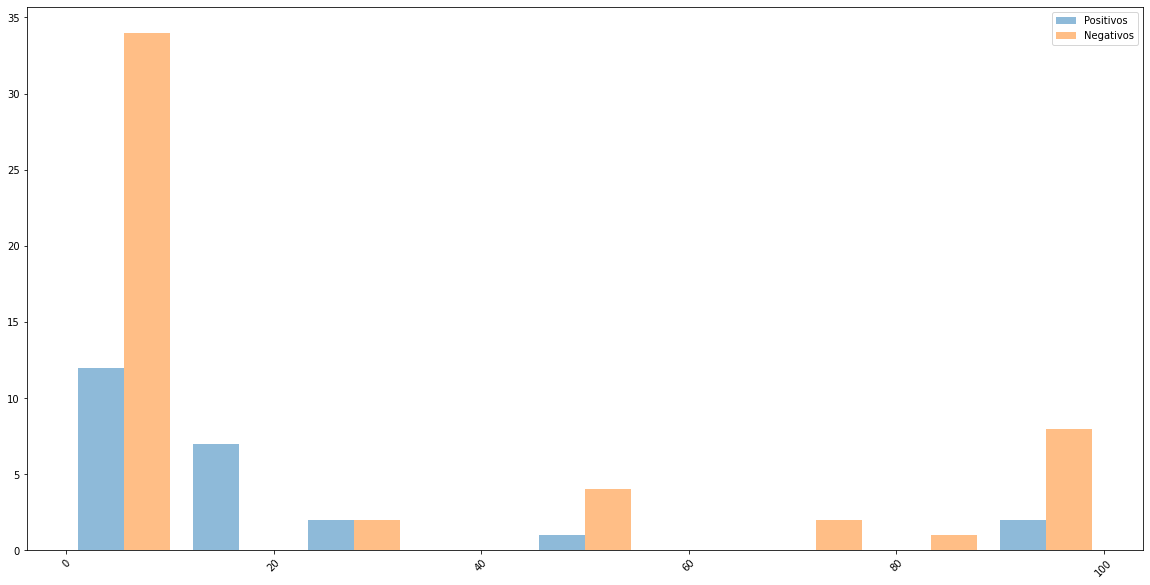

Asimetría: 1.3766047479949082
Curtosis: 0.3392676833263524
count     75.000000
mean      23.123467
std       35.801367
min        0.000000
25%        0.000000
50%        0.000000
75%       30.950000
max      100.000000
Name: sentiment_votes_down_percentage, dtype: float64 
Coeficiente de variación de Spearman: 1.5482698885964465 
--------------------------------

Tabla de frecuencias de variable sentiment_votes_up_percentage
(-0.001, 50.0]      18
(50.0, 84.413]       7
(84.413, 99.157]     8
(99.157, 100.0]     42
Name: sentiment_votes_up_percentage, dtype: int64


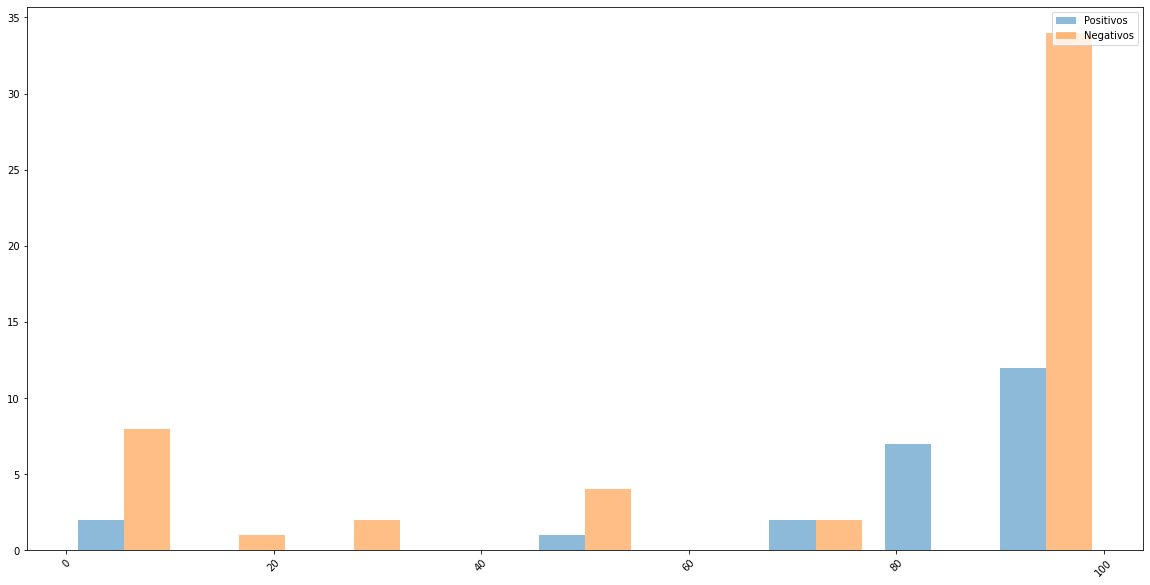

Asimetría: -1.3766047479949073
Curtosis: 0.3392676833263506
count     75.000000
mean      76.876533
std       35.801367
min        0.000000
25%       69.050000
50%      100.000000
75%      100.000000
max      100.000000
Name: sentiment_votes_up_percentage, dtype: float64 
Coeficiente de variación de Spearman: 0.46569955235533905 
--------------------------------

Tabla de frecuencias de variable reddit_accounts_active_48h
(-0.001, 5.0]    158
(5.0, 9.0]        27
(9.0, 11.0]       23
(11.0, 149.0]     22
Name: reddit_accounts_active_48h, dtype: int64


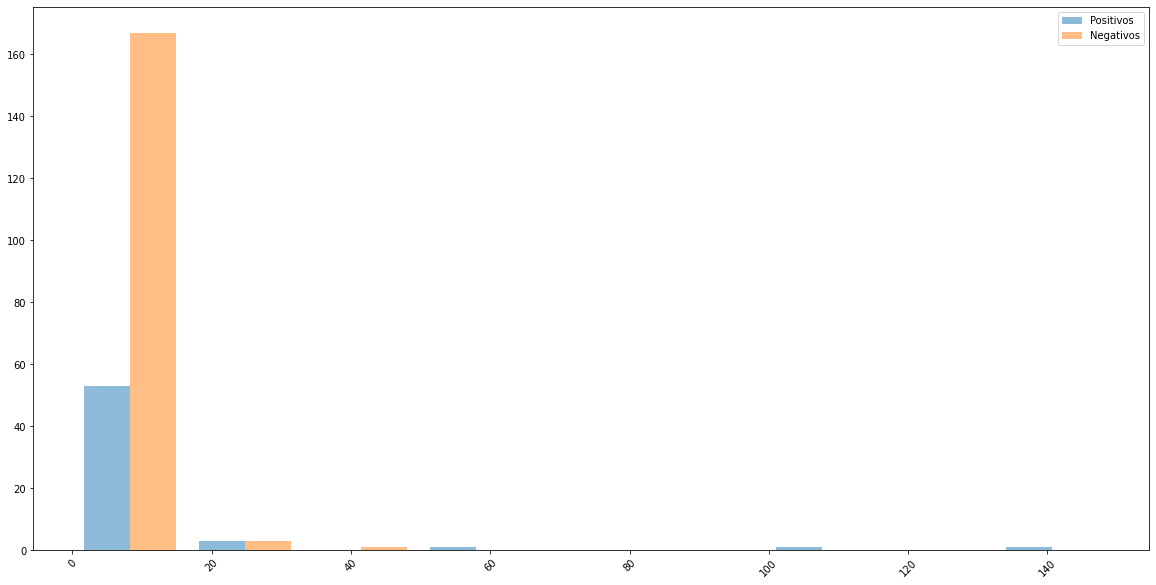

Asimetría: 7.528861414685972
Curtosis: 69.70223518719804
count    230.000000
mean       5.291304
std       13.592556
min        0.000000
25%        0.000000
50%        0.000000
75%        8.000000
max      149.000000
Name: reddit_accounts_active_48h, dtype: float64 
Coeficiente de variación de Spearman: 2.5688478004029762 
--------------------------------

Tabla de frecuencias de variable reddit_average_comments_48h
(-0.001, 48.5]    230
Name: reddit_average_comments_48h, dtype: int64


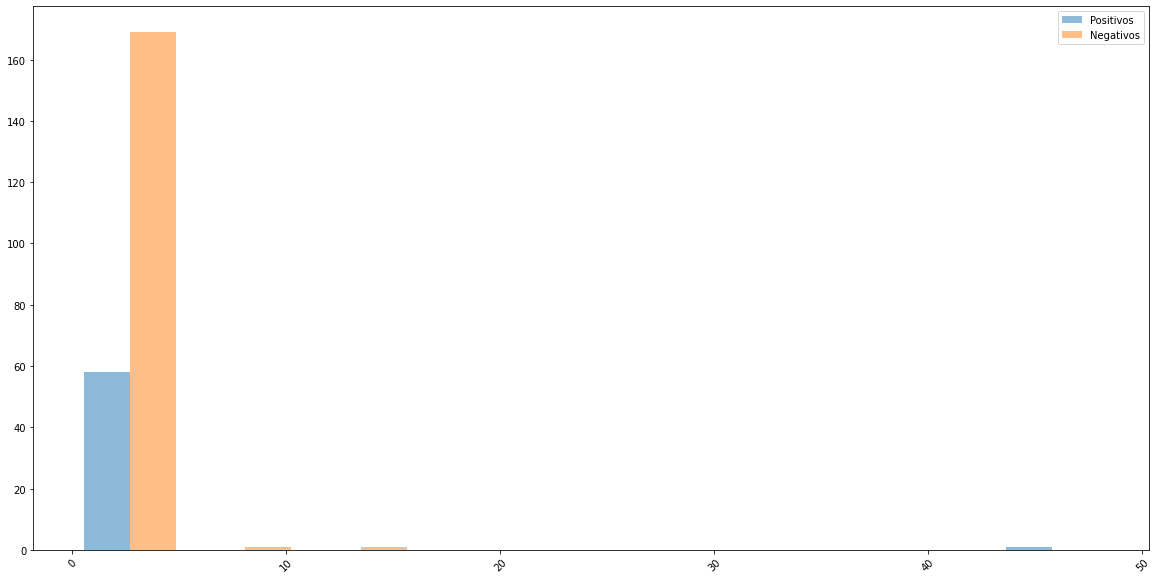

Asimetría: 13.613523984470646
Curtosis: 194.5157300549514
count    230.000000
mean       0.319304
std        3.329488
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       48.500000
Name: reddit_average_comments_48h, dtype: float64 
Coeficiente de variación de Spearman: 10.427317027857677 
--------------------------------

Tabla de frecuencias de variable reddit_subscribers
(-0.001, 197.667]       153
(197.667, 1040.778]      26
(1040.778, 2598.778]     25
(2598.778, 34943.0]      26
Name: reddit_subscribers, dtype: int64


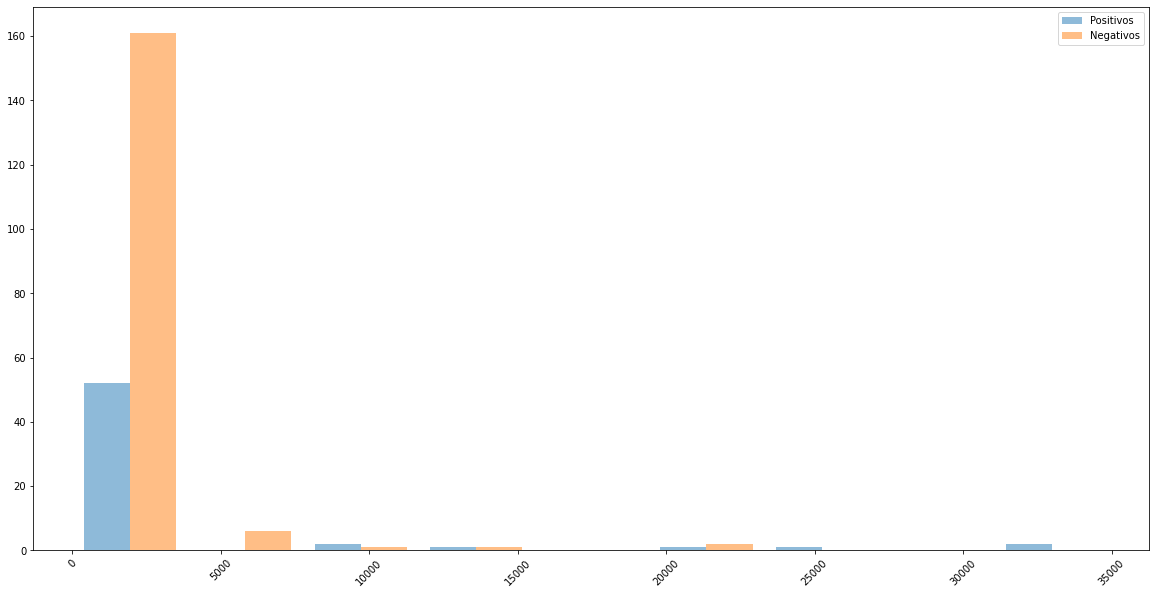

Asimetría: 5.085426157226028
Curtosis: 28.574087093621074
count      230.000000
mean      1471.247826
std       4683.101471
min          0.000000
25%          0.000000
50%          0.000000
75%        818.000000
max      34943.000000
Name: reddit_subscribers, dtype: float64 
Coeficiente de variación de Spearman: 3.1830813188240588 
--------------------------------

Tabla de frecuencias de variable twitter_followers
(-0.001, 91.556]          26
(91.556, 1598.667]        25
(1598.667, 3174.333]      26
(3174.333, 5964.778]      25
(5964.778, 9461.778]      26
(9461.778, 15423.333]     25
(15423.333, 27576.889]    26
(27576.889, 43650.333]    25
(43650.333, 280133.0]     26
Name: twitter_followers, dtype: int64


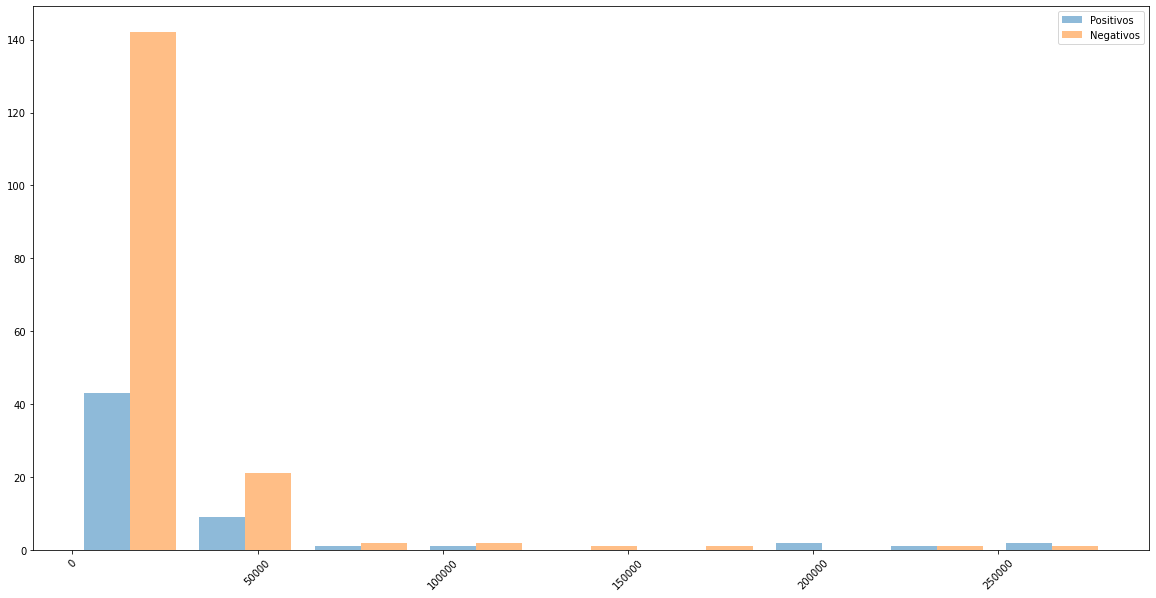

Asimetría: 3.9073223315589276
Curtosis: 16.539618580966376
count       230.000000
mean      22747.443478
std       45362.710817
min           0.000000
25%        1930.250000
50%        7361.500000
75%       22968.000000
max      280133.000000
Name: twitter_followers, dtype: float64 
Coeficiente de variación de Spearman: 1.9941894068426558 
--------------------------------

Tabla de frecuencias de variable telegram_channel_user_count
(6.999, 216.0]         25
(216.0, 516.0]         24
(516.0, 1203.0]        24
(1203.0, 1967.0]       24
(1967.0, 2950.0]       24
(2950.0, 4837.0]       24
(4837.0, 9731.0]       23
(9731.0, 19631.0]      25
(19631.0, 150803.0]    24
Name: telegram_channel_user_count, dtype: int64


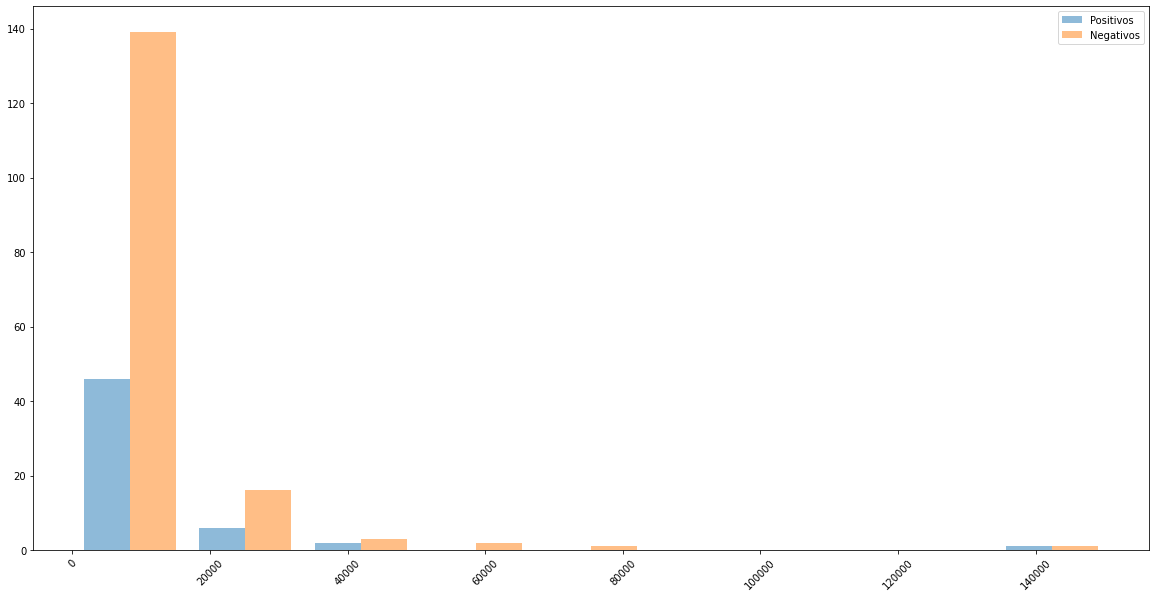

Asimetría: 5.358342447705197
Curtosis: 36.73458204941615
count       217.000000
mean       8218.557604
std       17454.531650
min           7.000000
25%         659.000000
50%        2419.000000
75%        8715.000000
max      150803.000000
Name: telegram_channel_user_count, dtype: float64 
Coeficiente de variación de Spearman: 2.1237950127191048 
--------------------------------

Tabla de frecuencias de variable price_month_3
(-0.0009999999647000001, 0.000589]    8
(0.000589, 0.00446]                   8
(0.00446, 0.0124]                     8
(0.0124, 0.029]                       7
(0.029, 0.0702]                       8
(0.0702, 0.162]                       8
(0.162, 0.362]                        7
(0.362, 0.964]                        8
(0.964, 2.264]                        8
Name: price_month_3, dtype: int64


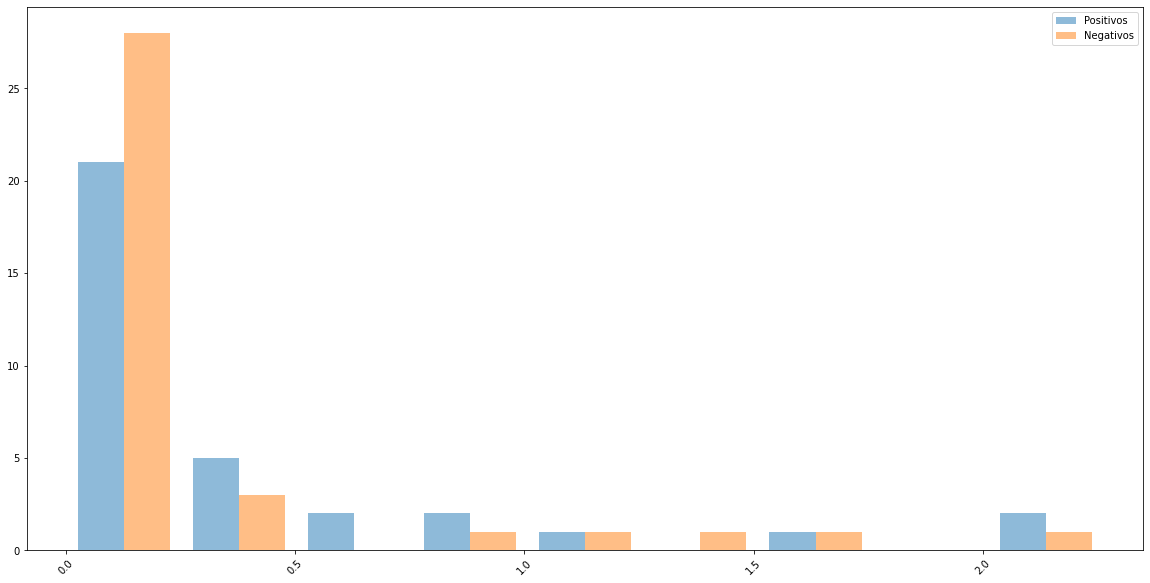

Asimetría: 2.326980988440552
Curtosis: 4.880727288795222
count    7.000000e+01
mean     3.125219e-01
std      5.586820e-01
min      3.528688e-11
25%      5.793239e-03
50%      5.211827e-02
75%      3.254832e-01
max      2.264328e+00
Name: price_month_3, dtype: float64 
Coeficiente de variación de Spearman: 1.7876570746312235 
--------------------------------

Tabla de frecuencias de variable porc_variance_m3
(-100.001, -99.884]           8
(-99.884, -93.571]            8
(-93.571, -6.391]             8
(-6.391, 153.722]             7
(153.722, 739.264]            8
(739.264, 2711.245]           8
(2711.245, 21290.79]          7
(21290.79, 163061.605]        8
(163061.605, 10324609.272]    8
Name: porc_variance_m3, dtype: int64


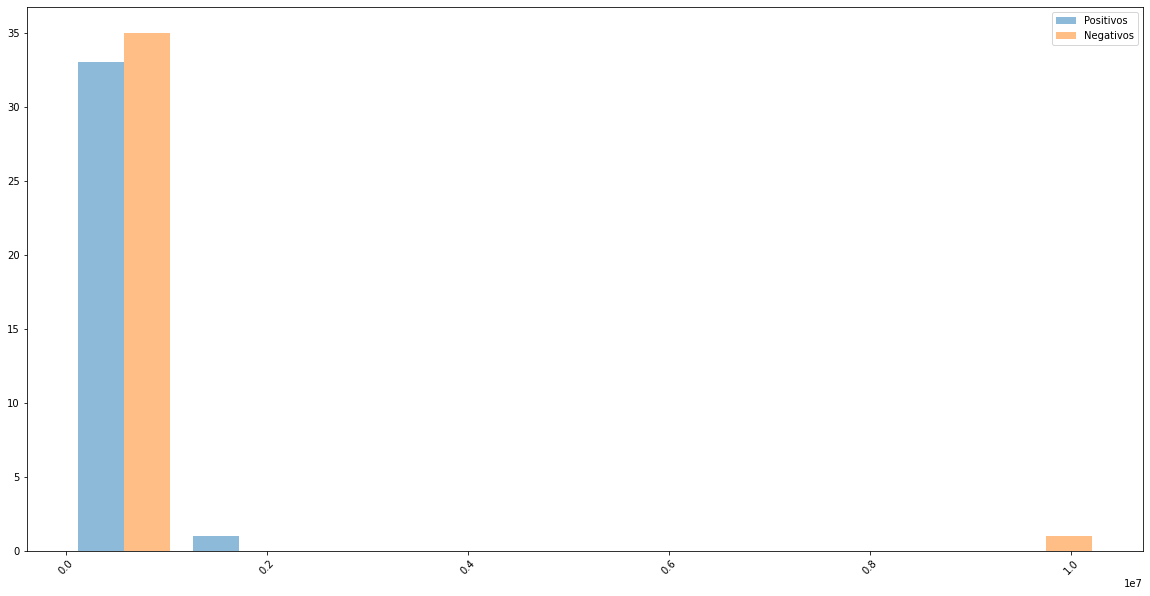

Asimetría: 8.166259534446048
Curtosis: 67.60942450947367
count    7.000000e+01
mean     1.945457e+05
std      1.238599e+06
min     -1.000000e+02
25%     -8.402806e+01
50%      3.280996e+02
75%      8.780664e+03
max      1.032461e+07
Name: porc_variance_m3, dtype: float64 
Coeficiente de variación de Spearman: 6.366624874689824 
--------------------------------

Tabla de frecuencias de variable price_month_6
(-0.0009999999575, 0.000451]    12
(0.000451, 0.00536]             11
(0.00536, 0.0119]               11
(0.0119, 0.0224]                11
(0.0224, 0.0403]                12
(0.0403, 0.123]                 11
(0.123, 0.249]                  11
(0.249, 0.741]                  11
(0.741, 24.068]                 12
Name: price_month_6, dtype: int64


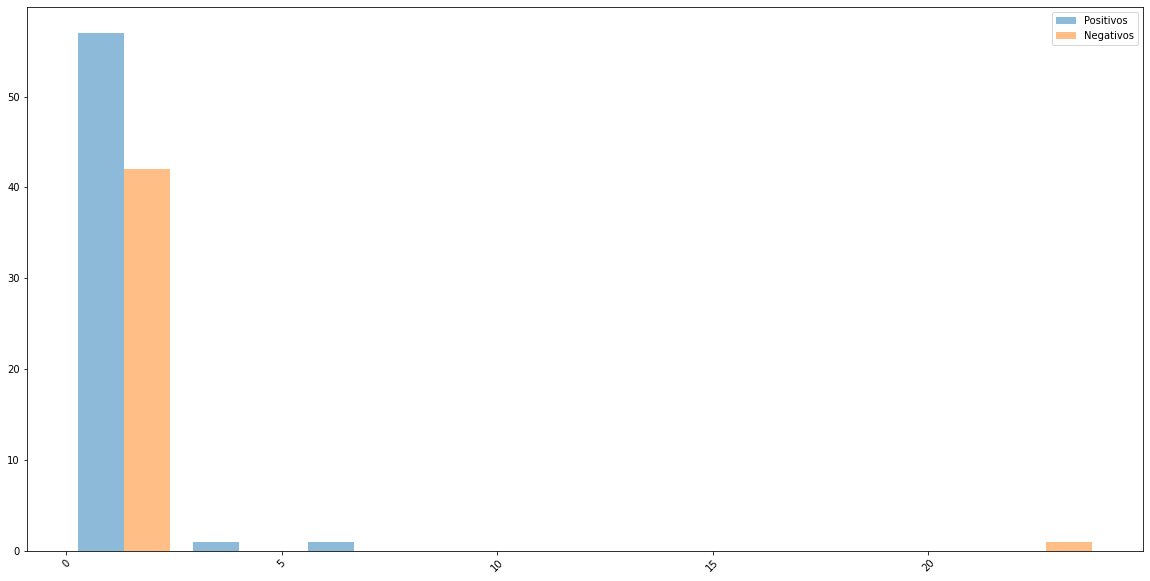

Asimetría: 8.387563884962814
Curtosis: 76.25079375815244
count    1.020000e+02
mean     5.500263e-01
std      2.528937e+00
min      4.248291e-11
25%      6.326782e-03
50%      3.194621e-02
75%      2.305305e-01
max      2.406786e+01
Name: price_month_6, dtype: float64 
Coeficiente de variación de Spearman: 4.597847998762927 
--------------------------------

Tabla de frecuencias de variable porc_variance_m6
(-100.001, -99.929]        12
(-99.929, -93.37]          11
(-93.37, -63.502]          11
(-63.502, 25.869]          11
(25.869, 680.949]          12
(680.949, 5251.178]        11
(5251.178, 12559.598]      11
(12559.598, 80284.71]      11
(80284.71, 1229528.883]    12
Name: porc_variance_m6, dtype: int64


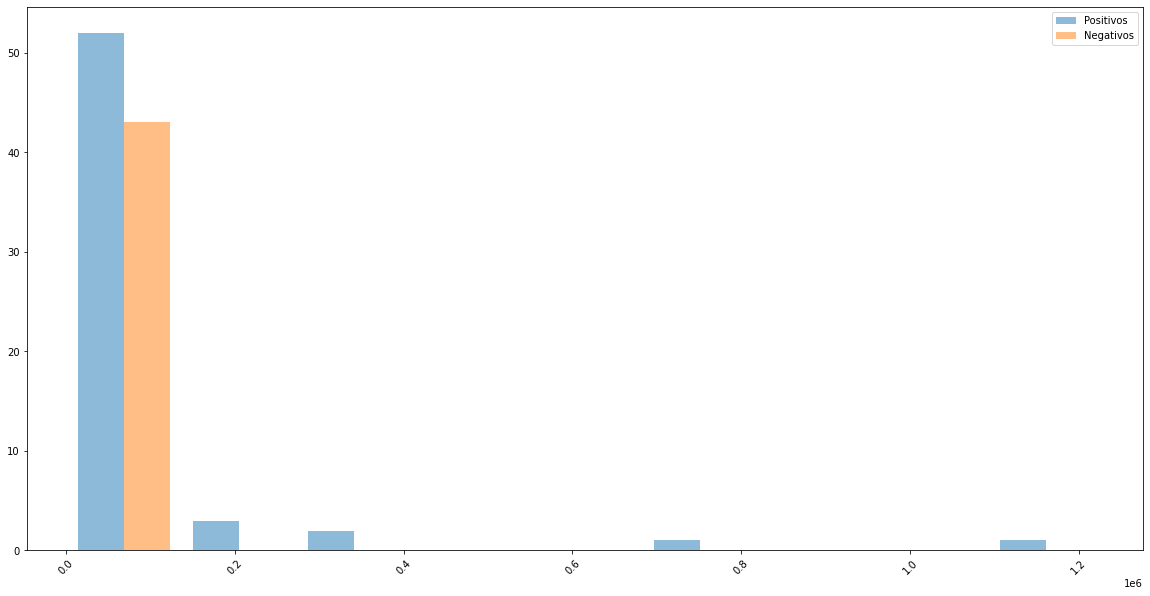

Asimetría: 6.042744950423296
Curtosis: 41.097631526742575
count    1.020000e+02
mean     4.131754e+04
std      1.530230e+05
min     -1.000000e+02
25%     -8.882981e+01
50%      2.181780e+02
75%      9.516119e+03
max      1.229529e+06
Name: porc_variance_m6, dtype: float64 
Coeficiente de variación de Spearman: 3.7035849990015417 
--------------------------------

count            230
unique           180
top       2018-01-08
freq               6
Name: ico_launch_datetime, dtype: object 
--------------------------------

Tabla de frecuencias de variable year
(2013.999, 2017.0]    53
(2017.0, 2018.0]      81
(2018.0, 2019.0]      24
(2019.0, 2021.0]      55
(2021.0, 2022.0]      17
Name: year, dtype: int64


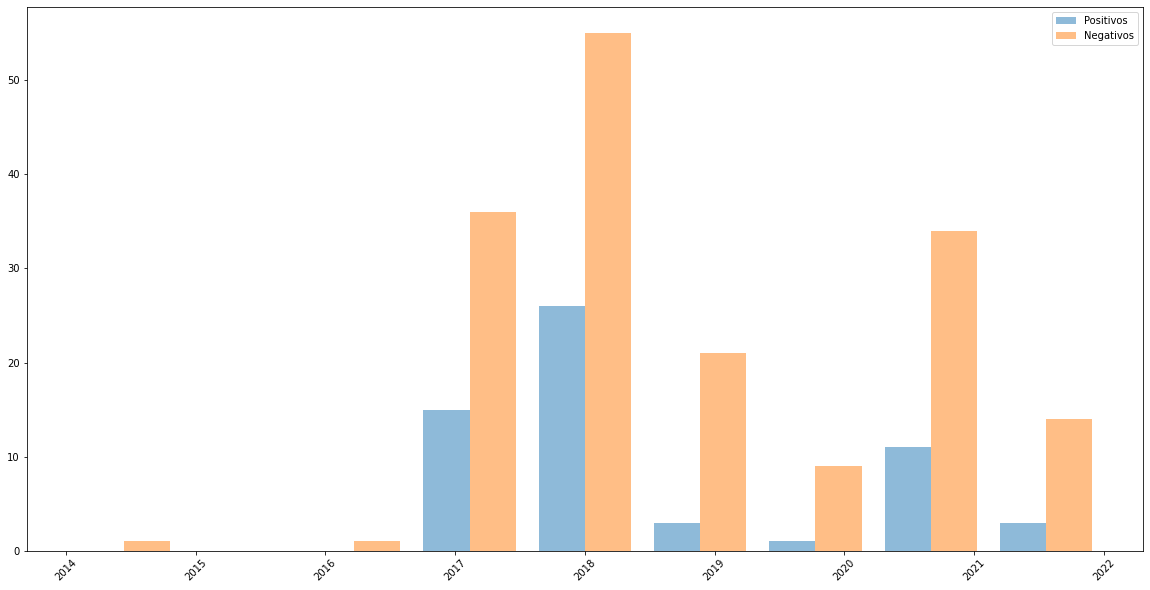

Asimetría: 0.48347816901229235
Curtosis: -0.8699987179576434
count     230.000000
mean     2018.826087
std         1.691287
min      2014.000000
25%      2018.000000
50%      2018.000000
75%      2021.000000
max      2022.000000
Name: year, dtype: float64 
Coeficiente de variación de Spearman: 0.000837757673325848 
--------------------------------

Tabla de frecuencias de variable month
(0.999, 3.0]    110
(3.0, 6.0]       34
(6.0, 7.0]       11
(7.0, 9.0]       27
(9.0, 11.0]      37
(11.0, 12.0]     11
Name: month, dtype: int64


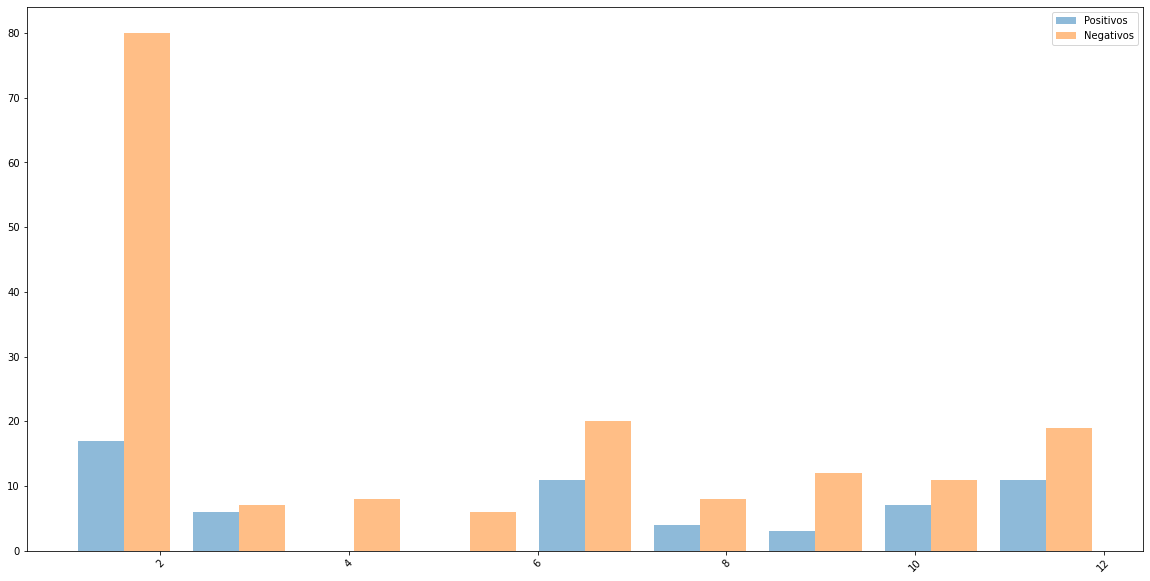

Asimetría: 0.36974046215547873
Curtosis: -1.42113927556454
count    230.000000
mean       5.065217
std        3.948369
min        1.000000
25%        1.000000
50%        4.000000
75%        9.000000
max       12.000000
Name: month, dtype: float64 
Coeficiente de variación de Spearman: 0.7795062467075253 
--------------------------------

Tabla de frecuencias de variable day
(0.999, 3.0]    28
(3.0, 6.0]      31
(6.0, 8.0]      22
(8.0, 11.0]     22
(11.0, 14.0]    28
(14.0, 16.0]    26
(16.0, 20.0]    27
(20.0, 25.0]    22
(25.0, 31.0]    24
Name: day, dtype: int64


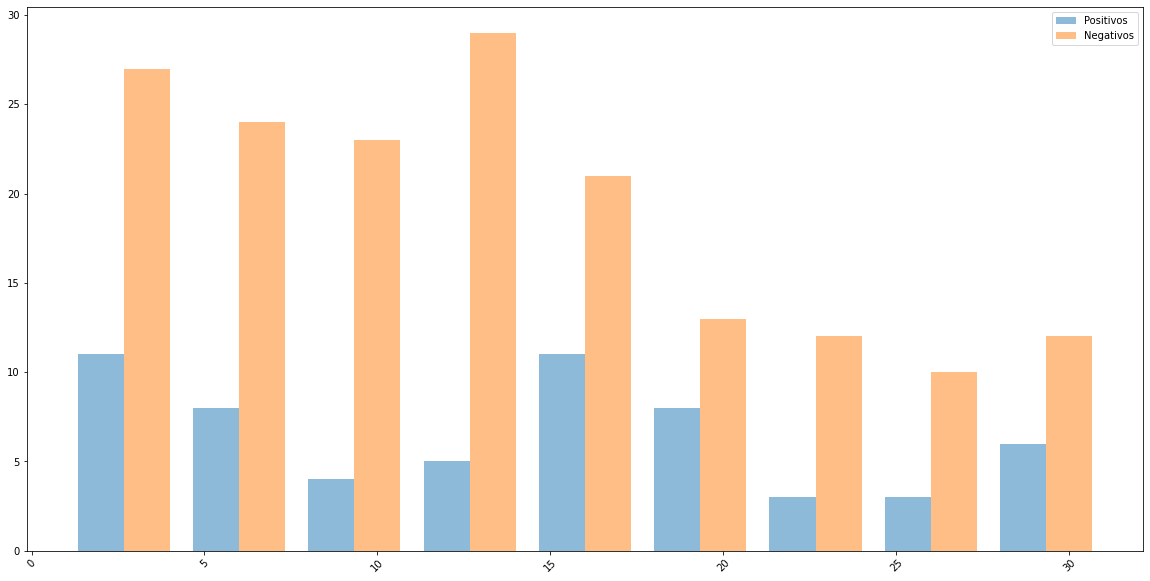

Asimetría: 0.42464709488541097
Curtosis: -0.8008971149254882
count    230.000000
mean      13.308696
std        8.279264
min        1.000000
25%        6.000000
50%       12.000000
75%       19.000000
max       31.000000
Name: day, dtype: float64 
Coeficiente de variación de Spearman: 0.6220943215876262 
--------------------------------

Tabla de frecuencias de variable quantity_gt
(-0.001, 80.778]      25
(80.778, 129.667]     24
(129.667, 165.0]      26
(165.0, 191.444]      22
(191.444, 230.0]      26
(230.0, 260.0]        23
(260.0, 335.667]      23
(335.667, 847.889]    24
(847.889, 1892.0]     25
Name: quantity_gt, dtype: int64


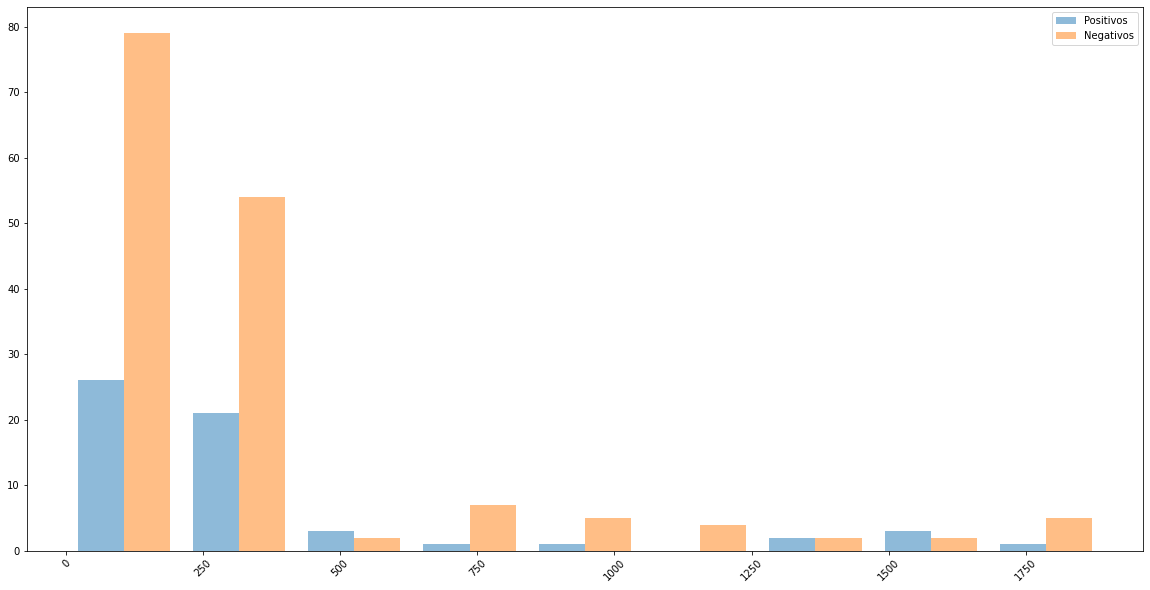

Asimetría: 2.296593812249238
Curtosis: 4.495063150843112
count     218.000000
mean      350.247706
std       408.228604
min         0.000000
25%       140.500000
50%       216.000000
75%       309.250000
max      1892.000000
Name: quantity_gt, dtype: float64 
Coeficiente de variación de Spearman: 1.1655425461486149 
--------------------------------

Tabla de frecuencias de variable target
(-0.001, 1.0]    230
Name: target, dtype: int64


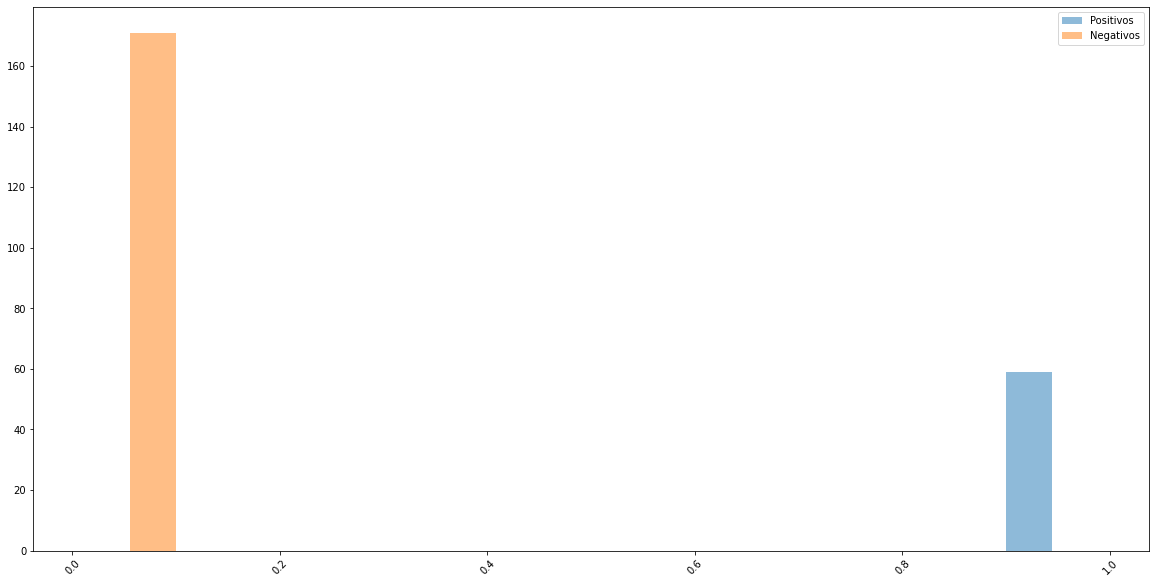

Asimetría: 1.1223822084949326
Curtosis: -0.7468285332647024
count    230.000000
mean       0.256522
std        0.437666
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64 
Coeficiente de variación de Spearman: 1.7061539903618375 
--------------------------------



In [ ]:
#En este punto se iterará sobre cada variable para obtener información
# estadística primaria sobre la estructura de las variables.

#Se obtienen entonces los principales estadísticos y, si la variable es float o int,
# se llama a la función freq_table para posteriormente
#Dar información sobre asimetría, curtosis y CV de Spearman.

for (columnName, columnData) in df_full.iteritems():
  
  if (df_full[columnName].dtype == np.float64 or df_full[columnName].dtype == np.int64) and df_full[columnName].isnull().sum() != len(df_full[columnName]):
    print("Tabla de frecuencias de variable {}".format(columnName))
    freq_table(columnName)
    plt.show()
    #print("\nGrafico de distribución: \n\n")
    #p = sns.displot(df_full[columnName], kind="kde", bw_adjust = .85)
    #p.fig.set_size_inches(20,10)
    #plt.show()
    print("Asimetría: {}".format(df_full[columnName].skew()))
    print("Curtosis: {}".format(df_full[columnName].kurt()))
    spearman = df_full[columnName].std()/df_full[columnName].mean()
    print(df_full[columnName].describe(),"\nCoeficiente de variación de Spearman: {} \n--------------------------------\n".format(spearman))
  else:
    print(df_full[columnName].describe(),"\n--------------------------------\n")

# Arbol de Decisión

In [ ]:
cols = ['ico_name', 'ico_price', 'category', 'porc_variance_m3', 'price_month_3',
        'price_month_6','porc_variance_m6','quantity_gt']

df_analysis = df_full[cols]

print("Cantidad de ICO en total :", len(df_full))

print('---------')
print('Cantidad de icos que estuvieron listadas en coingecko al tercer y sexto mes:')
print(len(df_analysis[(df_analysis.porc_variance_m3.notna()) & (df_analysis.porc_variance_m6.notna())]))

print('---------')
# Cantidad de icos que no estuvieron listadas en coingecko al tercer y sexto mes.
print('Cantidad de icos que no estuvieron listadas en coingecko al tercer y sexto mes:')
print(len(df_analysis[(df_analysis.porc_variance_m3.isna()) & (df_analysis.porc_variance_m6.isna())]))

print('---------')
# Cantidad de icos que no estuvieron listadas en coingecko al tercer mes 
# pero si en el sexto mes.
print('Cantidad de icos que no estuvieron listadas en coingecko al tercer mes' + 
     'pero si en el sexto mes:')
print(len(df_analysis[(df_analysis.porc_variance_m3.isna()) & (df_analysis.porc_variance_m6.notna())]))

print('---------')
# Cantidad de icos que no estuvieron listadas en coingecko al sexto mes 
# pero si en el tercer mes.
print('Cantidad de icos que no estuvieron listadas en coingecko al tercer mes' + 
     'pero si en el sexto mes:')
print(len(df_analysis[(df_analysis.porc_variance_m3.notna()) & (df_analysis.porc_variance_m6.isna())]))



Cantidad de ICO en total : 230
---------
Cantidad de icos que estuvieron listadas en coingecko al tercer y sexto mes:
63
---------
Cantidad de icos que no estuvieron listadas en coingecko al tercer y sexto mes:
121
---------
Cantidad de icos que no estuvieron listadas en coingecko al tercer mespero si en el sexto mes:
39
---------
Cantidad de icos que no estuvieron listadas en coingecko al tercer mespero si en el sexto mes:
7


In [ ]:

print("Cantidad de ICO con una precio mayor en el tercer mes que al 6to: ")
print(len(df_analysis[df_analysis.porc_variance_m3 > df_full.porc_variance_m6]))

print(' - ')

print("Cantidad de ICO con una precio menor en el tercer mes que al 6to: ")
print(len(df_analysis[df_analysis.porc_variance_m3 < df_full.porc_variance_m6]))

Cantidad de ICO con una precio mayor en el tercer mes que al 6to: 
45
 - 
Cantidad de ICO con una precio menor en el tercer mes que al 6to: 
18


Para comenzar con la modelización, tomamos algunos puntos a considerar. Primero 
que nada, en la especificación no tomaremos variables que son una reexpresión de la variable dependiente. Un ejemplo de este caso sería la variable "% por 6 meses" ya que simplemente toma el porcentaje de variación del precio y la variable target es una variable dicotómica que cambia en función del signo de dicha variación. 

 Por otro lado, haremos un análisis de correlación en las variables para intentar llevar a que las variables especificadas en el modelo tengan una correlación menor al 70%.

 Por último, las variables que tienen un alto porcentaje de valores nulos serán excluidas del modelo (nulos > 30% sobre el total).

In [ ]:
#Limpieza de columnas con nulos > 80%.

df = df_full.drop(labels = ["ico_end_month","accepted_currency","platform","max_supply",
        "total_value_locked","fully_diluted_valuation_usd",
        "market_cap_change_24h_in_currency_usd","market_cap_rank",
        "sentiment_votes_down_percentage","sentiment_votes_up_percentage",
        "price_month_3","price_month_6","porc_variance_m6","circulating_supply"], axis = 1)

In [ ]:
#Mapa de correlaciones, se eliminarán aquellas variables con una corr mayor al 70%

def correlation_analysis(columns_to_drop):
  correlation_matrix = df.drop(columns_to_drop, axis=1).corr()
  feature_correlation = pd.DataFrame(columns= ["feature_1","feature_2","corr", 
                                               "%nAn_feature1","%nAn_feature2"])


  for i, row in correlation_matrix.iterrows():
    for c in correlation_matrix.loc[:,correlation_matrix.columns != i]: #No itero sobre la columna que ya estoy analizando ya que en ese caso la correlación va a ser perfecta
      if abs(correlation_matrix.loc[i,c]) > 0.7:
        feature_correlation= feature_correlation.append({"feature_1":i,"feature_2": c,"corr":correlation_matrix.loc[i,c],
                                                         "%nAn_feature1": df[i].isna().sum()/len(df[i]),
                                                         "%nAn_feature2": df[c].isna().sum()/len(df[c])}, ignore_index=True)
  return(feature_correlation)

correlation_analysis(['target'])

,feature_1,feature_2,corr,%nAn_feature1,%nAn_feature2
0,public_interest_score,reddit_average_comments_48h,0.889884,0.0,0.0
1,reddit_accounts_active_48h,reddit_subscribers,0.816140,0.0,0.0
2,reddit_average_comments_48h,public_interest_score,0.889884,0.0,0.0
3,reddit_subscribers,reddit_accounts_active_48h,0.816140,0.0,0.0


Del mapa de correlaciones anterior, combinado con la cantidad de faltantes de las variables, decidimos excluir del modelo las siguientes variables:

* reddit_average_comments_48h
* reddit_accounts_active_48h	

Se ejecuta la función nuevamente para mostrar la inexistencia de correlaciones luego de eliminadas las variables mencionadas:


In [ ]:
correlation_analysis(['target',"reddit_average_comments_48h","reddit_accounts_active_48h"])

,feature_1,feature_2,corr,%nAn_feature1,%nAn_feature2


In [ ]:
df = df.drop(labels=["reddit_average_comments_48h","reddit_accounts_active_48h"], axis=1 )

In [ ]:

#Eliminamos las lineas donde no tenemos porcentaje de variación de precio en 3 meses.

df = df.dropna(subset=['porc_variance_m3'], axis=0)

In [ ]:
df.quantity_gt = df.quantity_gt.fillna(0)
df.telegram_channel_user_count = df.telegram_channel_user_count.fillna(0)


In [ ]:
#Estandarizamos variables numericas

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["quantity_gt"] = scaler.fit_transform(np.asarray(df["quantity_gt"]).reshape(-1,1))
scaler = StandardScaler()
df["twitter_followers"] = scaler.fit_transform(np.asarray(df["twitter_followers"]).reshape(-1,1))
scaler = StandardScaler()
df["reddit_subscribers"] = scaler.fit_transform(np.asarray(df["reddit_subscribers"]).reshape(-1,1))
scaler = StandardScaler()
df["porc_variance_m3"] = scaler.fit_transform(np.asarray(df["porc_variance_m3"]).reshape(-1,1))

scaler = StandardScaler()
df["total_supply"] = scaler.fit_transform(np.asarray(df["total_supply"]).reshape(-1,1))

#Transformamos las variables para poder incluirlas en el modelo

# Tratamos los datos para convertir las variables a numericas.
df.country = df.country.apply(lambda x: str(x).replace(', ','_'))
df.country = df.country.apply(lambda x: '_'.join(str(x).lower().split()))

df_country = pd.get_dummies(df.country, prefix='c')
df = pd.concat([df, df_country], axis=1)
df.drop(axis=1, labels='country',inplace=True)


#Generando el DF final para modelizar
df = df[['target','ico_price','porc_variance_m3','reddit_subscribers','twitter_followers','total_supply',
             'quantity_gt',  'telegram_channel_user_count','c_argentina', 'c_british_virgin_islands', 'c_cambodia', 'c_canada',
       'c_cayman_islands', 'c_czech_republic', 'c_estonia',
       'c_estonia_mongolia', 'c_indonesia', 'c_liechtenstein', 'c_lithuania',
       'c_malta', 'c_nan', 'c_nevis_and_saint_kitts', 'c_poland', 'c_russia',
       'c_singapore', 'c_switzerland', 'c_united_kingdom', 'c_united_states']].copy()
df = df[['target','ico_price','porc_variance_m3','reddit_subscribers','twitter_followers','total_supply',
             'quantity_gt',  'telegram_channel_user_count','c_argentina', 'c_british_virgin_islands', 'c_cambodia', 'c_canada',
       'c_cayman_islands', 'c_czech_republic', 'c_estonia',
       'c_estonia_mongolia', 'c_indonesia', 'c_liechtenstein', 'c_lithuania',
       'c_malta', 'c_nan', 'c_nevis_and_saint_kitts', 'c_poland', 'c_russia',
       'c_singapore', 'c_switzerland', 'c_united_kingdom', 'c_united_states']].copy()

df_log = df.copy()
df_log.ico_price = df_log.ico_price.apply(lambda x: np.log1p((x+1)))



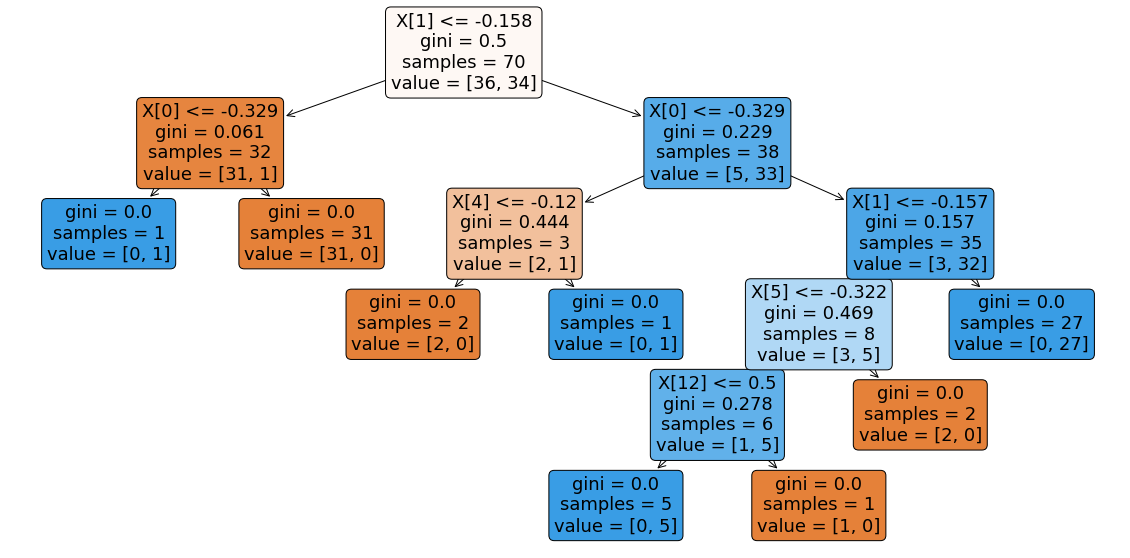

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

scaler = StandardScaler()
df["ico_price"] = scaler.fit_transform(np.asarray(df["ico_price"]).reshape(-1,1))

df_ad = df.copy()

md = None
tree_model = DecisionTreeClassifier()
columns_x = ['ico_price','porc_variance_m3','reddit_subscribers','twitter_followers','total_supply',
             'quantity_gt',  'telegram_channel_user_count','c_argentina', 'c_british_virgin_islands', 'c_cambodia', 'c_canada',
       'c_cayman_islands', 'c_czech_republic', 'c_estonia',
       'c_estonia_mongolia', 'c_indonesia', 'c_liechtenstein', 'c_lithuania',
       'c_malta', 'c_nan', 'c_nevis_and_saint_kitts', 'c_poland', 'c_russia',
       'c_singapore', 'c_switzerland', 'c_united_kingdom', 'c_united_states']
Y = df_ad.target
X = df_ad[columns_x]
tree_model = tree_model.fit(X, Y)
plot_tree(tree_model, filled=True, max_depth=md, rounded =True)
plt.show()

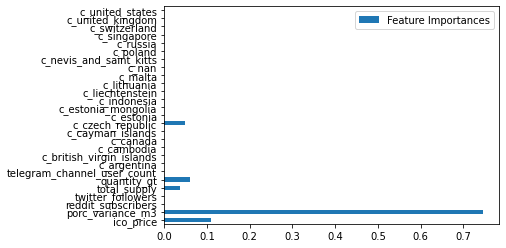

In [ ]:
df_imp = pd.DataFrame(tree_model.feature_importances_.reshape(1,-1), columns=columns_x, index=["Feature Importances"])
df_imp.T.plot.barh()
plt.legend()
plt.show()

In [ ]:
df_ad[['ico_price','reddit_subscribers','twitter_followers','total_supply']]

,ico_price,reddit_subscribers,twitter_followers,total_supply
3,-0.328171,-0.346952,-0.418946,-0.120430
4,-0.320223,-0.346952,-0.513928,-0.120432
6,1.296101,-0.346952,-0.513928,-0.120432
11,-0.321989,-0.346952,-0.416372,-0.120426
14,-0.328877,-0.343118,-0.458283,-0.120426
...,...,...,...,...
217,-0.329052,-0.346952,-0.136590,-0.120418
219,-0.329052,-0.346952,-0.512546,-0.120431
223,-0.329052,-0.346952,-0.437776,-0.120431
225,-0.329052,3.796400,0.220934,-0.120424


## Arbol de Decision - Transformacion Log


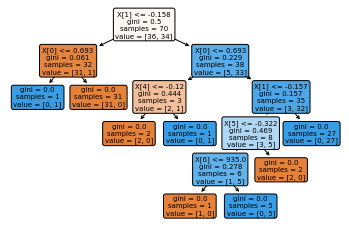

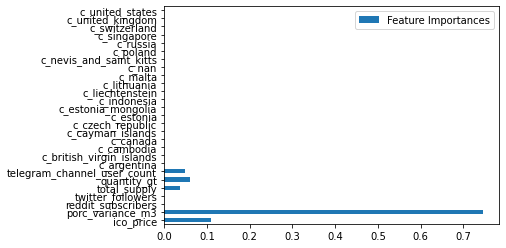

In [ ]:

df_ad = df_log.copy()

md = None
tree_model = DecisionTreeClassifier()
columns_x = ['ico_price','porc_variance_m3','reddit_subscribers','twitter_followers','total_supply',
             'quantity_gt',  'telegram_channel_user_count','c_argentina', 'c_british_virgin_islands', 'c_cambodia', 'c_canada',
       'c_cayman_islands', 'c_czech_republic', 'c_estonia',
       'c_estonia_mongolia', 'c_indonesia', 'c_liechtenstein', 'c_lithuania',
       'c_malta', 'c_nan', 'c_nevis_and_saint_kitts', 'c_poland', 'c_russia',
       'c_singapore', 'c_switzerland', 'c_united_kingdom', 'c_united_states']
Y = df_ad.target
X = df_ad[columns_x]
tree_model = tree_model.fit(X, Y)
plot_tree(tree_model, filled=True, max_depth=md, rounded =True)
plt.show()
df_imp = pd.DataFrame(tree_model.feature_importances_.reshape(1,-1), columns=columns_x, index=["Feature Importances"])
df_imp.T.plot.barh()
plt.legend()
plt.show()

# Random Forest


## RF con Country

In [ ]:
df_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf_tree__criterion,param_rf_tree__max_depth,param_rf_tree__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.016634,0.001040,0.003718,0.000093,gini,2,10,"{'rf_tree__criterion': 'gini', 'rf_tree__max_d...",0.708333,0.913043,0.913043,0.844807,0.096501,2,0.956522,0.957447,0.914894,0.942954,0.019845
1,0.067285,0.002905,0.007947,0.000509,gini,2,50,"{'rf_tree__criterion': 'gini', 'rf_tree__max_d...",0.708333,0.826087,0.913043,0.815821,0.083887,31,0.956522,0.957447,0.914894,0.942954,0.019845
2,0.134311,0.001789,0.012053,0.000842,gini,2,100,"{'rf_tree__criterion': 'gini', 'rf_tree__max_d...",0.708333,0.869565,0.913043,0.830314,0.088061,4,0.956522,0.914894,0.914894,0.928770,0.019624
3,0.256123,0.004811,0.029228,0.002250,gini,2,200,"{'rf_tree__criterion': 'gini', 'rf_tree__max_d...",0.708333,0.869565,0.913043,0.830314,0.088061,4,0.956522,0.936170,0.936170,0.942954,0.009594
4,0.019142,0.003185,0.004711,0.001009,gini,4,10,"{'rf_tree__criterion': 'gini', 'rf_tree__max_d...",0.791667,0.869565,0.913043,0.858092,0.050212,1,0.978261,0.978723,1.000000,0.985661,0.010141
5,0.065839,0.001260,0.008493,0.001777,gini,4,50,"{'rf_tree__criterion': 'gini', 'rf_tree__max_d...",0.708333,0.826087,0.913043,0.815821,0.083887,31,0.978261,0.978723,0.978723,0.978569,0.000218
6,0.135149,0.006554,0.017268,0.002350,gini,4,100,"{'rf_tree__criterion': 'gini', 'rf_tree__max_d...",0.708333,0.869565,0.913043,0.830314,0.088061,4,1.000000,0.978723,1.000000,0.992908,0.010030
7,0.278839,0.002480,0.022848,0.002058,gini,4,200,"{'rf_tree__criterion': 'gini', 'rf_tree__max_d...",0.708333,0.869565,0.913043,0.830314,0.088061,4,1.000000,0.978723,1.000000,0.992908,0.010030
8,0.017758,0.001557,0.003823,0.000117,gini,6,10,"{'rf_tree__criterion': 'gini', 'rf_tree__max_d...",0.666667,0.826087,0.869565,0.787440,0.087224,45,0.978261,1.000000,1.000000,0.992754,0.010248
9,0.069579,0.007519,0.009128,0.001312,gini,6,50,"{'rf_tree__criterion': 'gini', 'rf_tree__max_d...",0.708333,0.826087,0.913043,0.815821,0.083887,31,1.000000,0.978723,1.000000,0.992908,0.010030


In [ ]:
df.columns

Index(['target', 'ico_price', 'porc_variance_m3', 'reddit_subscribers',
       'twitter_followers', 'total_supply', 'quantity_gt',
       'telegram_channel_user_count', 'c_argentina',
       'c_british_virgin_islands', 'c_cambodia', 'c_canada',
       'c_cayman_islands', 'c_czech_republic', 'c_estonia',
       'c_estonia_mongolia', 'c_indonesia', 'c_liechtenstein', 'c_lithuania',
       'c_malta', 'c_nan', 'c_nevis_and_saint_kitts', 'c_poland', 'c_russia',
       'c_singapore', 'c_switzerland', 'c_united_kingdom', 'c_united_states'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# columns_x = ['quantity_gt','ico_price','porc_variance_m3','public_interest_score','market_cap_usd','reddit_subscribers','twitter_followers','total_supply','reddit_accounts_active_48h', 'reddit_average_comments_48h']
columns_x = df.columns.values[1:]
y = df.target
X = df[columns_x]

rf_tree = RandomForestClassifier()

pipe = Pipeline(steps= [('rf_tree', rf_tree)])

# Configuramos los parametros criterion y max_depth para que sean optimizados por el gridsearch
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
n_stimators = [10,50,100,200]
# Definimos los parametros que va a usar el GridSEarch para buscar el modelo optimo
parameters = dict(rf_tree__criterion=criterion,
                  rf_tree__max_depth=max_depth,
                  rf_tree__n_estimators = n_stimators)

clf_GS = GridSearchCV(pipe, parameters, cv=3, return_train_score=True)
clf_GS.fit(X, y)
print('Mejor Criterion:', clf_GS.best_estimator_.get_params()['rf_tree__criterion'])
print('Mejor max_depth:', clf_GS.best_estimator_.get_params()['rf_tree__max_depth'])
print('Mejor estimators:', clf_GS.best_estimator_.get_params()['rf_tree__n_estimators'])
print()
df_results = pd.DataFrame(clf_GS.cv_results_)

df_results[(df_results.param_rf_tree__criterion ==  clf_GS.best_estimator_.get_params()['rf_tree__criterion']) &
           (df_results.param_rf_tree__max_depth == clf_GS.best_estimator_.get_params()['rf_tree__max_depth'])&
           (df_results.param_rf_tree__n_estimators == clf_GS.best_estimator_.get_params()['rf_tree__n_estimators'] )]

Mejor Criterion: gini
Mejor max_depth: 2
Mejor estimators: 50



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf_tree__criterion,param_rf_tree__max_depth,param_rf_tree__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
1,0.063498,0.001273,0.00676,0.000064,gini,2,50,"{'rf_tree__criterion': 'gini', 'rf_tree__max_d...",0.708333,0.869565,0.913043,0.830314,0.088061,1,0.934783,0.914894,0.957447,0.935708,0.017385


<BarContainer object of 27 artists>

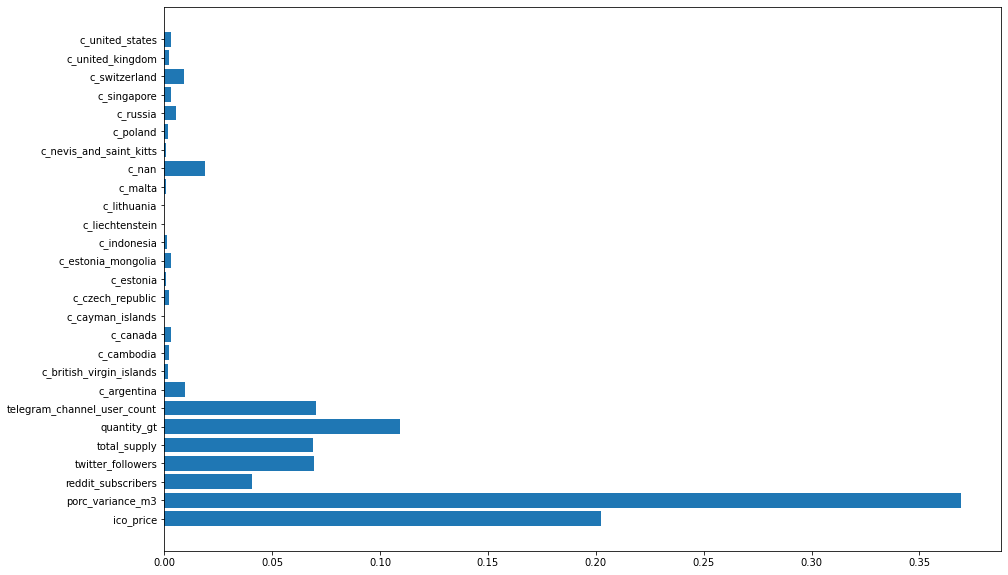

In [ ]:
# Con la obtención del mejor arbol devuelto por GridSearch, reentrenamos el 
# el arbol y obtenemos las variables importantes
clf = RandomForestClassifier(n_estimators=50, max_depth=8,criterion='gini')
clf= clf.fit(X, y)

plt.figure(figsize=(15,10))
plt.barh(columns_x,clf.feature_importances_)


Con las variables porc_variance_m3, ico_price, quantity_gt, twitter_followers, total_supply, public_interest_score, market_cap_usd se obtiene mas del 90% de las variables importantes a utilizar en los modelos.

## RF sin Country


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 3 to 229
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   target                       70 non-null     int64  
 1   ico_price                    70 non-null     float64
 2   porc_variance_m3             70 non-null     float64
 3   reddit_subscribers           70 non-null     float64
 4   twitter_followers            70 non-null     float64
 5   total_supply                 70 non-null     float64
 6   quantity_gt                  70 non-null     float64
 7   telegram_channel_user_count  70 non-null     float64
 8   c_argentina                  70 non-null     uint8  
 9   c_british_virgin_islands     70 non-null     uint8  
 10  c_cambodia                   70 non-null     uint8  
 11  c_canada                     70 non-null     uint8  
 12  c_cayman_islands             70 non-null     uint8  
 13  c_czech_republic     

In [ ]:
df = df.iloc[:,0:8]

# columns_x = ['quantity_gt','ico_price','porc_variance_m3','public_interest_score','market_cap_usd','reddit_subscribers','twitter_followers','total_supply','reddit_accounts_active_48h', 'reddit_average_comments_48h']
columns_x = df.columns.values[1:]
y = df.target
X = df[columns_x]

rf_tree = RandomForestClassifier()

pipe = Pipeline(steps= [('rf_tree', rf_tree)])

# Configuramos los parametros criterion y max_depth para que sean optimizados por el gridsearch
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
n_stimators = [10,50,100,200]
# Definimos los parametros que va a usar el GridSEarch para buscar el modelo optimo
parameters = dict(rf_tree__criterion=criterion,
                  rf_tree__max_depth=max_depth,
                  rf_tree__n_estimators = n_stimators)

clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)
print('Mejor Criterion:', clf_GS.best_estimator_.get_params()['rf_tree__criterion'])
print('Mejor max_depth:', clf_GS.best_estimator_.get_params()['rf_tree__max_depth'])
print('Mejor estimators:', clf_GS.best_estimator_.get_params()['rf_tree__n_estimators'])
print()
print(clf_GS.best_estimator_.get_params()['rf_tree'])

Mejor Criterion: gini
Mejor max_depth: 2
Mejor estimators: 100

RandomForestClassifier(max_depth=2)


<BarContainer object of 7 artists>

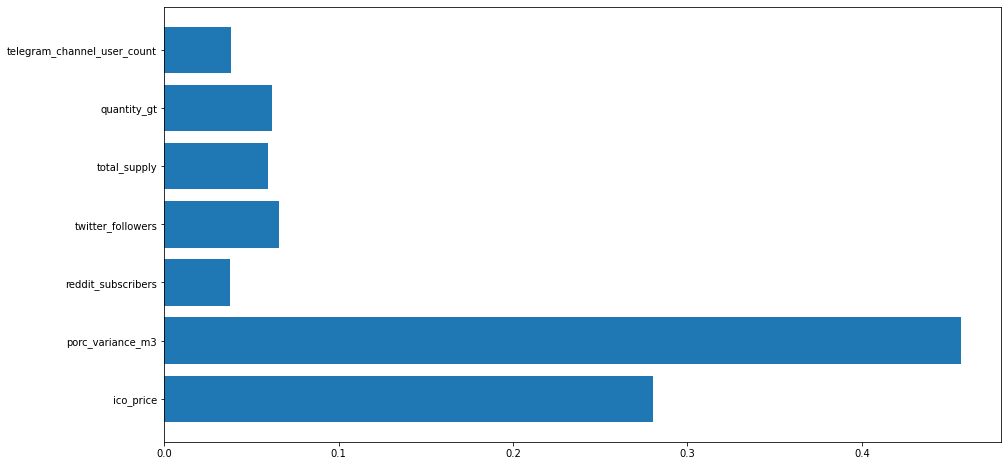

In [ ]:
# Con la obtención del mejor arbol devuelto por GridSearch, re-entrenamos el 
# el arbol y obtenemos las variables importantes
clf = RandomForestClassifier(n_estimators=100, max_depth=2,criterion='gini')
clf= clf.fit(X, y)

plt.figure(figsize=(15,8))
plt.barh(columns_x,clf.feature_importances_)


# RF - Log

## Con Country

Mejor Criterion: gini
Mejor max_depth: 2
Mejor estimators: 50



<BarContainer object of 27 artists>

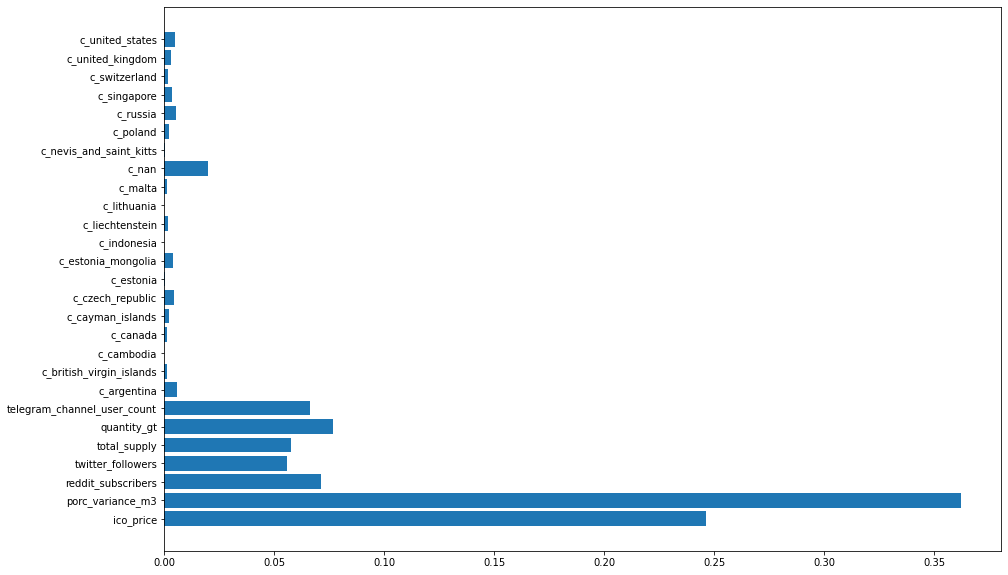

In [ ]:

# columns_x = ['quantity_gt','ico_price','porc_variance_m3','public_interest_score','market_cap_usd','reddit_subscribers','twitter_followers','total_supply','reddit_accounts_active_48h', 'reddit_average_comments_48h']
columns_x = df_log.columns.values[1:]

y = df_log.target
X = df_log[columns_x]

rf_tree = RandomForestClassifier()

pipe = Pipeline(steps= [('rf_tree', rf_tree)])

# Configuramos los parametros criterion y max_depth para que sean optimizados por el gridsearch
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
n_stimators = [10,50,100,200]
# Definimos los parametros que va a usar el GridSEarch para buscar el modelo optimo
parameters = dict(rf_tree__criterion=criterion,
                  rf_tree__max_depth=max_depth,
                  rf_tree__n_estimators = n_stimators)

clf_GS = GridSearchCV(pipe, parameters, cv=3, return_train_score=True)
clf_GS.fit(X, y)
print('Mejor Criterion:', clf_GS.best_estimator_.get_params()['rf_tree__criterion'])
print('Mejor max_depth:', clf_GS.best_estimator_.get_params()['rf_tree__max_depth'])
print('Mejor estimators:', clf_GS.best_estimator_.get_params()['rf_tree__n_estimators'])
print()
df_results = pd.DataFrame(clf_GS.cv_results_)

df_results[(df_results.param_rf_tree__criterion ==  clf_GS.best_estimator_.get_params()['rf_tree__criterion']) &
           (df_results.param_rf_tree__max_depth == clf_GS.best_estimator_.get_params()['rf_tree__max_depth'])&
           (df_results.param_rf_tree__n_estimators == clf_GS.best_estimator_.get_params()['rf_tree__n_estimators'] )]
# Con la obtención del mejor arbol devuelto por GridSearch, reentrenamos el 
# el arbol y obtenemos las variables importantes
clf = RandomForestClassifier(n_estimators=50, max_depth=8,criterion='gini')
clf= clf.fit(X, y)

plt.figure(figsize=(15,10))
plt.barh(columns_x,clf.feature_importances_)

## Sin Country

In [ ]:
df_log.columns.values[:8]

array(['target', 'ico_price', 'porc_variance_m3', 'reddit_subscribers',
       'twitter_followers', 'total_supply', 'quantity_gt',
       'telegram_channel_user_count'], dtype=object)

Mejor Criterion: entropy
Mejor max_depth: 8
Mejor estimators: 10

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=10)


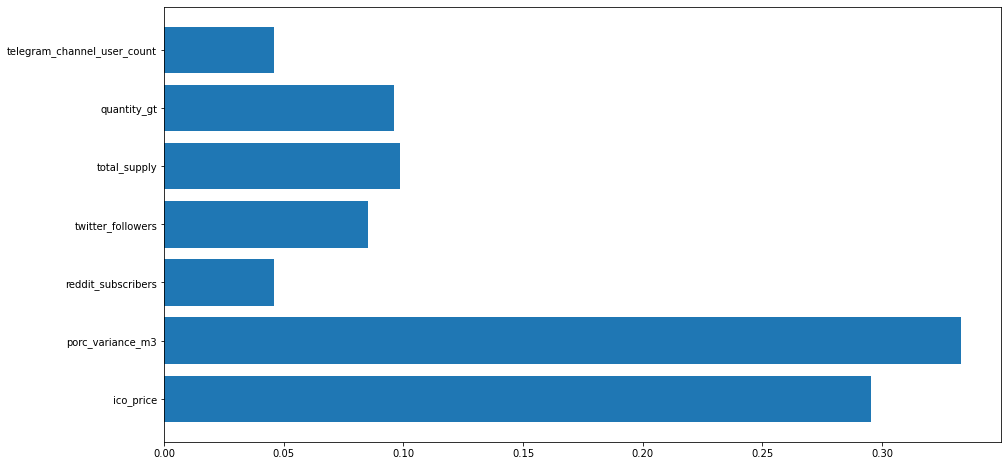

In [ ]:

# columns_x = ['quantity_gt','ico_price','porc_variance_m3','public_interest_score','market_cap_usd','reddit_subscribers','twitter_followers','total_supply','reddit_accounts_active_48h', 'reddit_average_comments_48h']
columns_x = df_log.columns.values[1:8]
y = df_log.target
X = df_log[columns_x]

rf_tree = RandomForestClassifier()

pipe = Pipeline(steps= [('rf_tree', rf_tree)])

# Configuramos los parametros criterion y max_depth para que sean optimizados por el gridsearch
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
n_stimators = [10,50,100,200]
# Definimos los parametros que va a usar el GridSEarch para buscar el modelo optimo
parameters = dict(rf_tree__criterion=criterion,
                  rf_tree__max_depth=max_depth,
                  rf_tree__n_estimators = n_stimators)

clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)
print('Mejor Criterion:', clf_GS.best_estimator_.get_params()['rf_tree__criterion'])
print('Mejor max_depth:', clf_GS.best_estimator_.get_params()['rf_tree__max_depth'])
print('Mejor estimators:', clf_GS.best_estimator_.get_params()['rf_tree__n_estimators'])
print()
print(clf_GS.best_estimator_.get_params()['rf_tree'])

# Con la obtención del mejor arbol devuelto por GridSearch, re-entrenamos el 
# el arbol y obtenemos las variables importantes
clf = RandomForestClassifier(n_estimators=100, max_depth=2,criterion='gini')
clf= clf.fit(X, y)

plt.figure(figsize=(15,8))
plt.barh(columns_x,clf.feature_importances_)
plt.show()

# Conclusiones

In [ ]:
#Leemos nuevamente el dataframe sin procesar para no tomar en cuenta posibles transformaciones (ej.: tratamiento de nulos)

def freq_table(columnName):
  #Regla Sturges para dividir en buckets los datos contínuos
  # print(1+3.22*np.log10(len(df_full)))
  freq = pd.qcut(df_full[columnName], round(1+3.22*np.log10(len(df_full))), duplicates = "drop")
  freq.sort_values(inplace=True)
  plt.figure(figsize=(20, 10))
  plt.hist([df_full[df_full["target"] == 1][columnName],
            df_full[df_full["target"] != 1][columnName]],
            round(1+3.22*np.log10(len(df_full))),alpha = 0.5, label = ["Positivos","Negativos"])
  plt.legend(loc= 'upper right')
  #histo  = freq.value_counts(sort = False).plot( kind = 'bar', ylabel = 'frequency')
  plt.xticks(rotation = 45)
  return print(freq.value_counts(sort= False)) 

Como principal conclusión podemos encontrar a nivel de proyecto que al día de 
hoy, y sin tomar en cuenta posibles soluciones pagas, aún no se encuentra un nivel de madurez en las ICOs que permita tener suficiente nivel de calidad en sus datos como para modelizar el éxito o fracaso de las mismas al cabo de seis meses. A pesar de lo anterior, este trabajo buscó entender cuales son las variables mas significativas dentro de las que obtuvimos para, a futuro, lograr modelizar con base en las mismas.

A partir de lo anterior, y con los modelos generados, tomamos como criterio analizar aquellas variables donde su importancia relativa a los modelos sea superior a un 5% ya sea en el árbol de decisión simple o en el Random Forest.

Como consecuencia de lo anterior, encontramos que las variables que mayor importancia tienen son (por orden decreciente de importancia):

*   porc_variance_m3
*   ico_price
*   quantity_gt
*   telegram_channel_user_count
*   total_supply
*   twitter_followers

Procederemos ahora a realizar un análisis de estadística descrpitiva de dichas variables para las observaciones obtenidas.



***porc_variance_m3*** refiere al porcentaje de variación del precio de la ICO 3 meses posterior a su lanzamiento. Dado que refiere a una variable monetaria de precio, definimos que es una variable cuantitativa continua con las siguientes características:

Tabla de frecuencias de porc_variance_m3
(-100.001, -99.884]           8
(-99.884, -93.571]            8
(-93.571, -6.391]             8
(-6.391, 153.722]             7
(153.722, 739.264]            8
(739.264, 2711.245]           8
(2711.245, 21290.79]          7
(21290.79, 163061.605]        8
(163061.605, 10324609.272]    8
Name: porc_variance_m3, dtype: int64


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


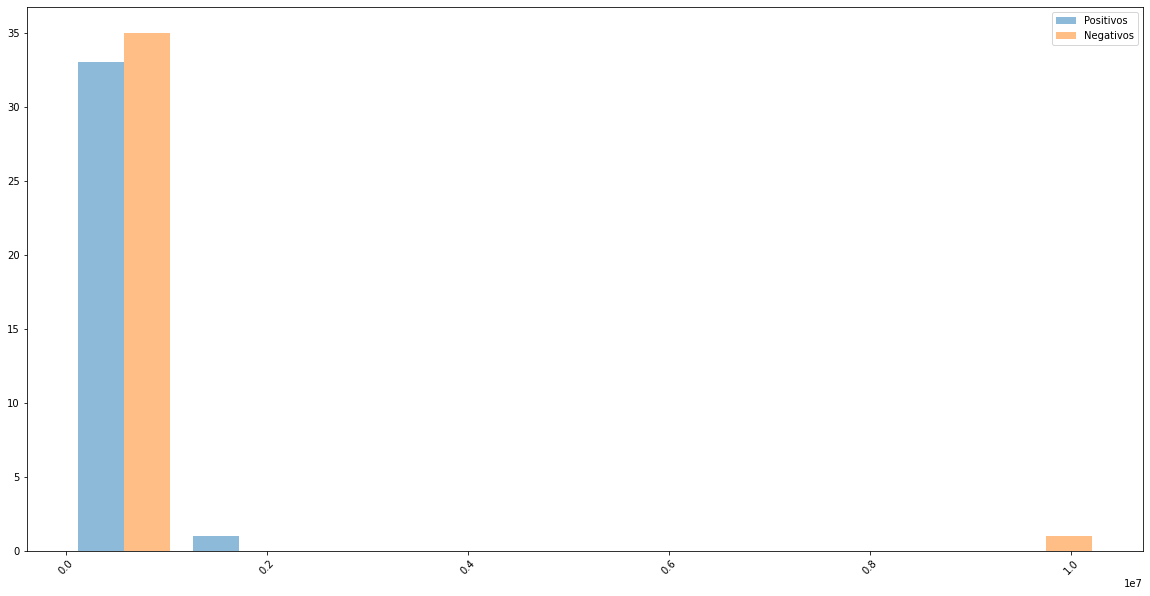

Asimetría: 8.166259534446048
Curtosis: 67.60942450947367
count    7.000000e+01
mean     1.945457e+05
std      1.238599e+06
min     -1.000000e+02
25%     -8.402806e+01
50%      3.280996e+02
75%      8.780664e+03
max      1.032461e+07
Name: porc_variance_m3, dtype: float64 
Coeficiente de variación de Spearman: 6.366624874689824 
--------------------------------

Recuento de nulos: 160 
Porcentaje de nulos sobre el total: 69.57


In [ ]:
import matplotlib.pyplot as plt

print("Tabla de frecuencias de porc_variance_m3")
freq_table("porc_variance_m3")
plt.show()
print("Asimetría: {}".format(df_full["porc_variance_m3"].skew()))
print("Curtosis: {}".format(df_full["porc_variance_m3"].kurt()))
spearman = df_full["porc_variance_m3"].std()/df_full["porc_variance_m3"].mean()
print(df_full["porc_variance_m3"].describe(),"\nCoeficiente de variación de Spearman: {} \n--------------------------------\n".format(spearman)) 
print("Recuento de nulos: {} \nPorcentaje de nulos sobre el total: {}".format(df_full.porc_variance_m3.isna().sum(), 
                                                                              round(df_full.porc_variance_m3.isna().sum()/len(df_full.porc_variance_m3)*100,2)))

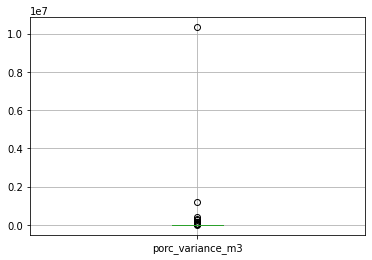

In [ ]:
df_full.boxplot("porc_variance_m3")

Se puede notar que la distribución del porcentaje de variación del precio de la 
criptomoneda a los 3 meses de su lanzamiento es de asimetría positiva y con forma leptocúrtica. Esto implica que hay una alta concentración de datos hacia la izquierda de la media. Esto se acompaña también por el hecho de que se encuentran valores extremos que tienden a desdibujar el valor de la media y generan dicha asimetría. A efectos empíricos, este movimiento se traduce en que una baja cantidad de criptomonedas tienen una variación positiva muy alta, en comparación al total general. 

Cabe destacar también que la variable tiene un porcentaje de nulos sobre el total de observaciones del 69,57% lo cual implica que su distribución no es un buen estimador de los valores poblacionales.

Con respecto a ***ico_price*** es una variable cuantitativa continua que refiere al precio de lanzamiento de la moneda. En el caso actual de análisis, sus principales estadísticos son los siguientes:

Tabla de frecuencias de ico_price
(-0.00099999995, 0.000189]    100
(0.000189, 0.000346]            2
(0.000346, 0.02]               27
(0.02, 0.0977]                 24
(0.0977, 0.3]                  28
(0.3, 7.478]                   23
(7.478, 5679.216]              26
Name: ico_price, dtype: int64


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


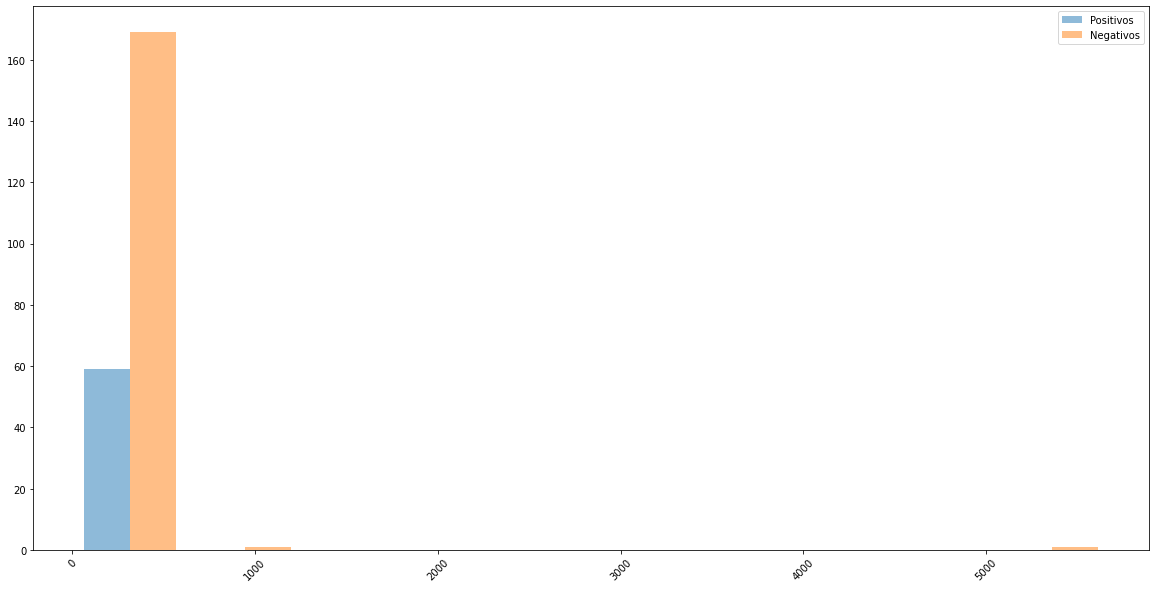

Asimetría: 14.070535379545372
Curtosis: 207.0743493820172
count    2.300000e+02
mean     4.800788e+01
std      3.827384e+02
min      5.000000e-11
25%      1.890700e-04
50%      8.350000e-03
75%      2.475000e-01
max      5.679216e+03
Name: ico_price, dtype: float64 
Coeficiente de variación de Spearman: 7.972408358717402 
--------------------------------

Recuento de nulos: 0 
Porcentaje de nulos sobre el total: 0.0


In [ ]:

print("Tabla de frecuencias de ico_price")
freq_table("ico_price")
plt.show()
print("Asimetría: {}".format(df_full["ico_price"].skew()))
print("Curtosis: {}".format(df_full["ico_price"].kurt()))
spearman = df_full["ico_price"].std()/df_full["ico_price"].mean()
print(df_full["ico_price"].describe(),"\nCoeficiente de variación de Spearman: {} \n--------------------------------\n".format(spearman)) 
print("Recuento de nulos: {} \nPorcentaje de nulos sobre el total: {}".format(df_full.ico_price.isna().sum(), 
                                                                              round(df_full.ico_price.isna().sum()/len(df_full.ico_price)*100,2)))

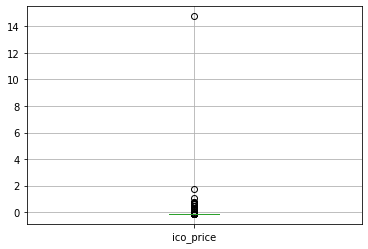

In [ ]:
df_full["ico_price"] = scaler.fit_transform(np.asarray(df_full["ico_price"]).reshape(-1,1))

df_full.boxplot("ico_price")

Al igual que en el caso anterior, la distribución tiene una asimetrías positiva y de forma leptocúrtica lo cual hace que se encuentre una alta concentración de observaciones sobre el primer rango de valores. Esto nuevamente surge por el hecho de algunas pocas ICOs que fueron lanzadas a un alto precio inicial, no coincidiendo con la tendencia general. 

En este caso, el 100% de las observaciones analizadas poseen datos sobre esta variable.

La variable ***quantity_gt*** son la cantidad de búsquedas que arroja Google Trend para cada criptomoneda al momento de su lanzamiento. Al ser un conteo, entendemos que es una variable cuantitativa continua.

Tabla de frecuencias de quantity_gt
(-0.001, 80.778]      25
(80.778, 129.667]     24
(129.667, 165.0]      26
(165.0, 191.444]      22
(191.444, 230.0]      26
(230.0, 260.0]        23
(260.0, 335.667]      23
(335.667, 847.889]    24
(847.889, 1892.0]     25
Name: quantity_gt, dtype: int64


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


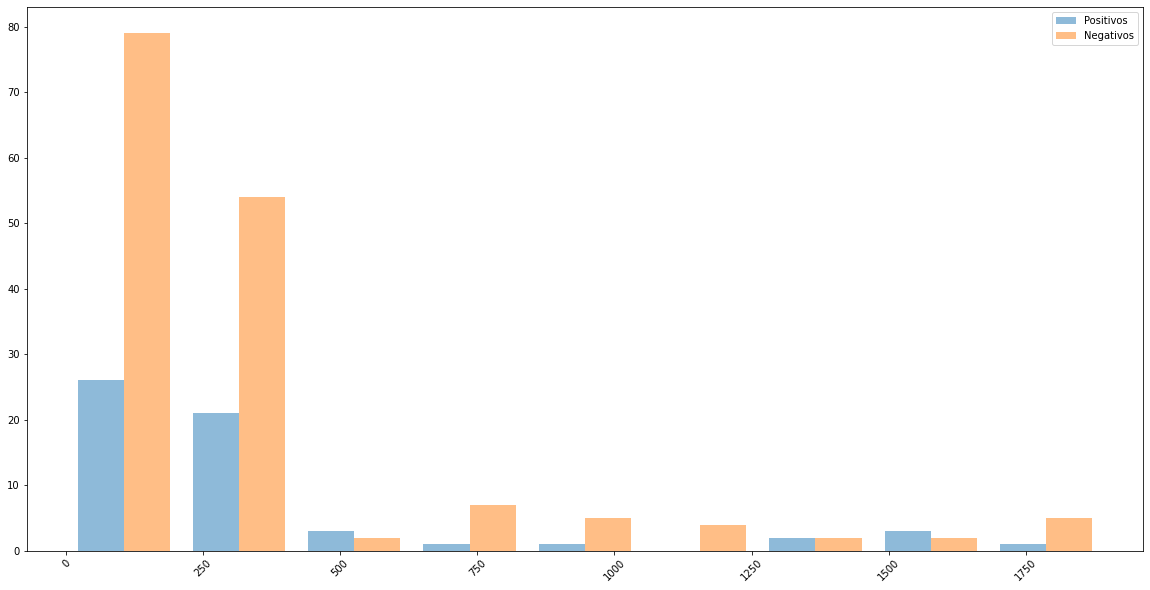

Asimetría: 2.296593812249238
Curtosis: 4.495063150843112
count     218.000000
mean      350.247706
std       408.228604
min         0.000000
25%       140.500000
50%       216.000000
75%       309.250000
max      1892.000000
Name: quantity_gt, dtype: float64 
Coeficiente de variación de Spearman: 1.1655425461486149 
--------------------------------

Recuento de nulos: 12 
Porcentaje de nulos sobre el total: 5.22


In [ ]:

print("Tabla de frecuencias de quantity_gt")
freq_table("quantity_gt")
plt.show()
print("Asimetría: {}".format(df_full["quantity_gt"].skew()))
print("Curtosis: {}".format(df_full["quantity_gt"].kurt()))
spearman = df_full["quantity_gt"].std()/df_full["quantity_gt"].mean()
print(df_full["quantity_gt"].describe(),"\nCoeficiente de variación de Spearman: {} \n--------------------------------\n".format(spearman)) 
print("Recuento de nulos: {} \nPorcentaje de nulos sobre el total: {}".format(df_full.quantity_gt.isna().sum(), 
                                                                              round(df_full.quantity_gt.isna().sum()/len(df_full.quantity_gt)*100,2)))

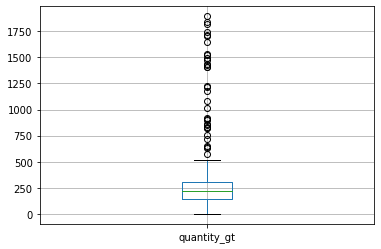

In [ ]:
df_full.boxplot("quantity_gt")

Para el caso de google trends, se puede notar que la distribución es un poco menos influida por pocos valores extremos (a pesar de que si posee una cantidad considerable de valores extremos). Esto implica que, si bien la forma de la distribución aún es leptocúrtica y con asimetría positiva, dichas características son menos potentes que en el caso de las variables anteriores.

***telegram_channel_user_count*** refiere a la cantidad de usuarios de telegram que seguían al canal de la criptomoneda al momento de su lanzamiento. Al igual que en el caso anterior, siendo un conteo, entendemos que es una variable cuantitativa discreta.

Tabla de frecuencias de telegram_channel_user_count
(6.999, 216.0]         25
(216.0, 516.0]         24
(516.0, 1203.0]        24
(1203.0, 1967.0]       24
(1967.0, 2950.0]       24
(2950.0, 4837.0]       24
(4837.0, 9731.0]       23
(9731.0, 19631.0]      25
(19631.0, 150803.0]    24
Name: telegram_channel_user_count, dtype: int64


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


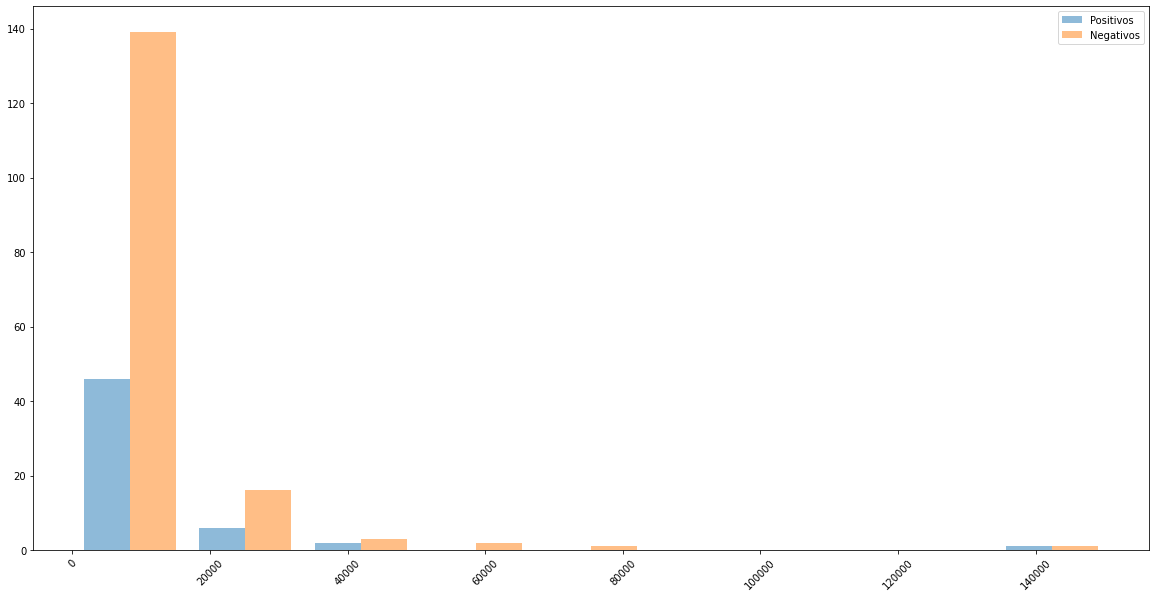

Asimetría: 5.358342447705197
Curtosis: 36.73458204941615
count       217.000000
mean       8218.557604
std       17454.531650
min           7.000000
25%         659.000000
50%        2419.000000
75%        8715.000000
max      150803.000000
Name: telegram_channel_user_count, dtype: float64 
Coeficiente de variación de Spearman: 2.1237950127191048 
--------------------------------

Recuento de nulos: 13 
Porcentaje de nulos sobre el total: 5.65


In [ ]:

print("Tabla de frecuencias de telegram_channel_user_count")
freq_table("telegram_channel_user_count")
plt.show()
print("Asimetría: {}".format(df_full["telegram_channel_user_count"].skew()))
print("Curtosis: {}".format(df_full["telegram_channel_user_count"].kurt()))
spearman = df_full["telegram_channel_user_count"].std()/df_full["telegram_channel_user_count"].mean()
print(df_full["telegram_channel_user_count"].describe(),"\nCoeficiente de variación de Spearman: {} \n--------------------------------\n".format(spearman)) 
print("Recuento de nulos: {} \nPorcentaje de nulos sobre el total: {}".format(df_full.telegram_channel_user_count.isna().sum(), 
                                                                              round(df_full.telegram_channel_user_count.isna().sum()/len(df_full.telegram_channel_user_count)*100,2)))

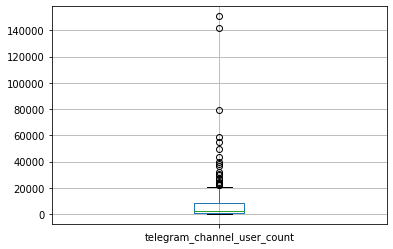

In [ ]:
df_full.boxplot("telegram_channel_user_count")

Igual que en los casos anteriores, posee una fuerte influencia de los valores extremos a la hora de calcular su media, generando asimetrías positiva y forma leptocúrtica.

***total_supply*** refiere a la cantidad de monedas circulantes o en depósito pendientes de su liberación. Dicha métrica se extrae al momento en que dicha ICO comienza su cotización. Son la cantidad de monedas que se tranzaran cuando se lance la ICO. Es una variable cuantitativa continua.

Tabla de frecuencias de total_supply
(100000.999, 18888888.889]         25
(18888888.889, 85324264.0]         25
(85324264.0, 101297344.667]        24
(101297344.667, 246156359.444]     25
(246156359.444, 500000000.0]       28
(500000000.0, 1000000000.0]        36
(1000000000.0, 1703983721.778]      9
(1703983721.778, 10000000000.0]    28
(10000000000.0, 1e+17]             22
Name: total_supply, dtype: int64


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


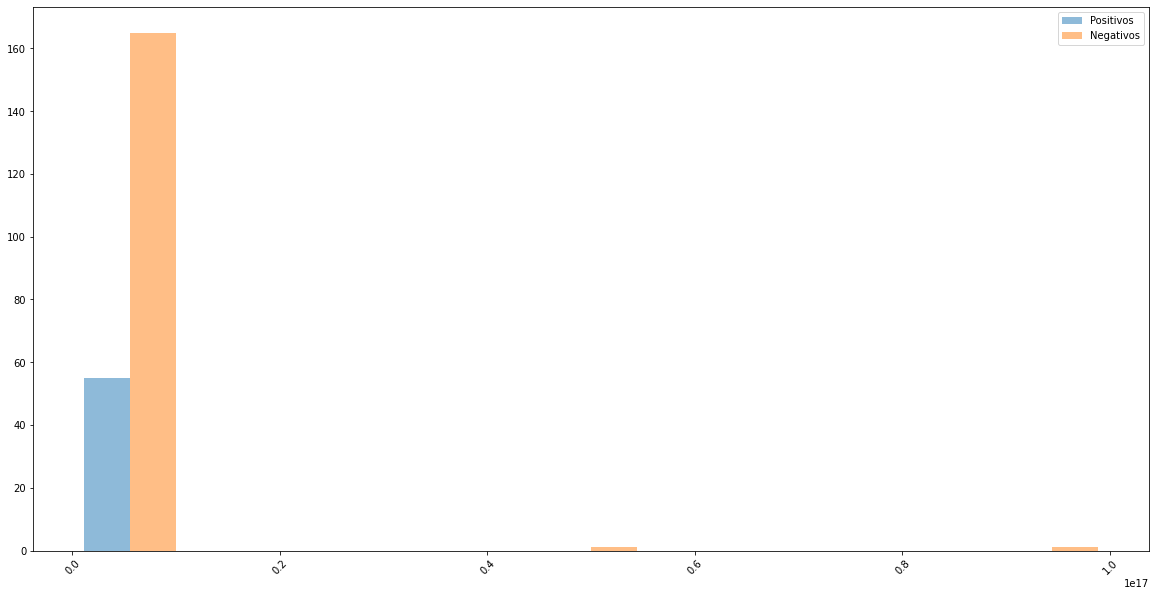

Asimetría: 11.948700092740454
Curtosis: 149.4440584028538
count    2.220000e+02
mean     6.824513e+14
std      7.489920e+15
min      1.000010e+05
25%      1.000000e+08
50%      3.450003e+08
75%      1.109770e+09
max      1.000000e+17
Name: total_supply, dtype: float64 
Coeficiente de variación de Spearman: 10.97502380076128 
--------------------------------

Recuento de nulos: 8 
Porcentaje de nulos sobre el total: 3.48


In [ ]:
print("Tabla de frecuencias de total_supply")
freq_table("total_supply")
plt.show()
print("Asimetría: {}".format(df_full["total_supply"].skew()))
print("Curtosis: {}".format(df_full["total_supply"].kurt()))
spearman = df_full["total_supply"].std()/df_full["total_supply"].mean()
print(df_full["total_supply"].describe(),"\nCoeficiente de variación de Spearman: {} \n--------------------------------\n".format(spearman)) 
print("Recuento de nulos: {} \nPorcentaje de nulos sobre el total: {}".format(df_full.total_supply.isna().sum(), 
                                                                              round(df_full.total_supply.isna().sum()/len(df_full.total_supply)*100,2)))

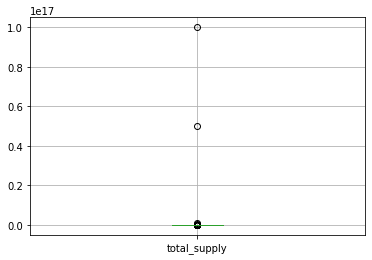

In [ ]:
df_full.boxplot("total_supply")

Por último, ***twitter_followers*** refiere a la cantidad de seguidores en twitter que tiene la moneda al momento de lanzamiento. Es una variable cuantitativa discreta.

Tabla de frecuencias de twitter_followers
(-0.001, 91.556]          26
(91.556, 1598.667]        25
(1598.667, 3174.333]      26
(3174.333, 5964.778]      25
(5964.778, 9461.778]      26
(9461.778, 15423.333]     25
(15423.333, 27576.889]    26
(27576.889, 43650.333]    25
(43650.333, 280133.0]     26
Name: twitter_followers, dtype: int64


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


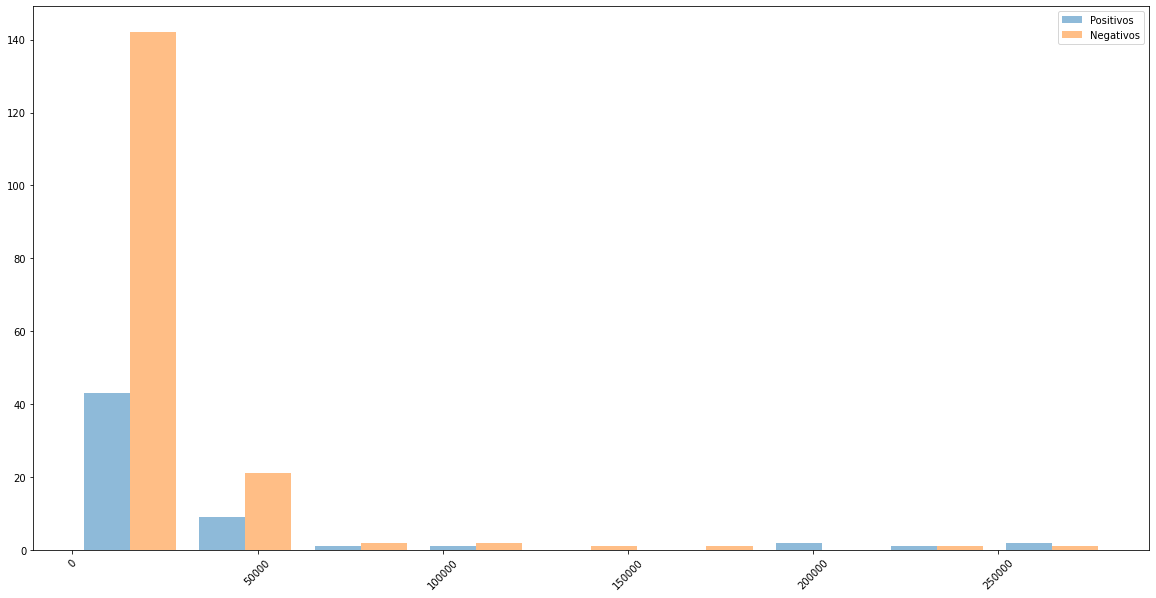

Asimetría: 3.9073223315589276
Curtosis: 16.539618580966376
count       230.000000
mean      22747.443478
std       45362.710817
min           0.000000
25%        1930.250000
50%        7361.500000
75%       22968.000000
max      280133.000000
Name: twitter_followers, dtype: float64 
Coeficiente de variación de Spearman: 1.9941894068426558 
--------------------------------

Recuento de nulos: 0 
Porcentaje de nulos sobre el total: 0.0


In [ ]:
print("Tabla de frecuencias de twitter_followers")
freq_table("twitter_followers")
plt.show()
print("Asimetría: {}".format(df_full["twitter_followers"].skew()))
print("Curtosis: {}".format(df_full["twitter_followers"].kurt()))
spearman = df_full["twitter_followers"].std()/df_full["twitter_followers"].mean()
print(df_full["twitter_followers"].describe(),"\nCoeficiente de variación de Spearman: {} \n--------------------------------\n".format(spearman)) 
print("Recuento de nulos: {} \nPorcentaje de nulos sobre el total: {}".format(df_full.twitter_followers.isna().sum(), 
                                                                              round(df_full.twitter_followers.isna().sum()/len(df_full.twitter_followers)*100,2)))

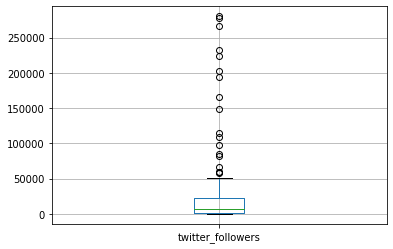

In [ ]:
df_full.boxplot("twitter_followers")

En todos los casos vistos anteriormente, se nota que se tiene una forma leptocúrtica con asimetría positiva. Esto surge por el hecho de que la media de las variables se encuentra fuertemente influida por los valores outliers. Estos valores outliers, si bien importantes, no generaron una influencia significativa en los modelos generados. El motivo de lo anterior es que tanto el árbol de decisión como el Random Forest (que es una variación de muchos árboles de decisión) son robustos a este tipo de valores atípicos.

Por último, cabe resaltar que al realizar los histogramas separados por clase (positivo/negativo) no se notaron a simple vista diferencias en sus distribuciones que indiquen un punto de quiebre significativo al discriminar entre clases.